<a href="https://colab.research.google.com/github/pwartenb/carla_urop/blob/main/carla_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install pytorch-lightning

# numpy for non-GPU array math
import numpy as np

# 🍦 Vanilla PyTorch
import torch
from torch.nn import functional as F
from torch import nn
from torch.utils.data import Dataset, TensorDataset, DataLoader

# 👀 Torchvision for CV
from torchvision.datasets import MNIST
from torchvision import transforms

# ⚡ PyTorch Lightning
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.profiler import AdvancedProfiler
pl.seed_everything(hash("setting random seeds") % 2**32 - 1)

In [ ]:
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import os
import cv2
import random
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
t_1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.02, 0.02, 0.06, 0.06, 0.06, 0.06, 0.1, 0.1, 0.1, 0.1, 0.14, 0.14, 0.14, 0.14, 0.18, 0.18, 0.18, 0.18, 0.22, 0.22, 0.22, 0.22, 0.26, 0.26, 0.26, 0.26, 0.3, 0.3, 0.3, 0.3, 0.34, 0.34, 0.34, 0.34, 0.38, 0.38, 0.38, 0.38, 0.42, 0.42, 0.42, 0.42, 0.46, 0.46, 0.46, 0.46, 0.5, 0.5, 0.5, 0.5, 0.54, 0.54, 0.54, 0.54, 0.58, 0.58, 0.58, 0.58, 0.62, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.66, 0.7, 0.7, 0.7, 0.7, 0.74, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.78, 0.82, 0.82, 0.82, 0.82, 0.859999, 0.859999, 0.859999, 0.859999, 0.899999, 0.899999, 0.899999, 0.899999, 0.939999, 0.939999, 0.939999, 0.939999, 0.979999, 0.979999, 0.979999, 0.979999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.176405, 0.176405, 0.176405, 0.176405, 0.230618, 0.230618, 0.230618, 0.230618, 0.624301, 0.624301, 0.624301, 0.624301, 0.628477, 0.628477, 0.628477, 0.628477, 0.628477, 0.628477, 0.628477, 0.628477, 0.629469, 0.629469, 0.629469, 0.629469, 0.689029, 0.689029, 0.689029, 0.689029, 0.554553, 0.554553, 0.554553, 0.554553, 0.554553, 0.554553, 0.554553, 0.554553, 0.464607, 0.464607, 0.464607, 0.464607, 0.386631, 0.386631, 0.386631, 0.386631, 0.276367, 0.276367, 0.276367, 0.276367, 0.256777, 0.256777, 0.256777, 0.256777, 0.256777, 0.256777, 0.256777, 0.256777, 0.256022, 0.256022, 0.256022, 0.256022, 0.270015, 0.270015, 0.270015, 0.270015, 0.270015, 0.270015, 0.270015, 0.270015, 0.283004, 0.283004, 0.283004, 0.283004, 0.283004, 0.283004, 0.283004, 0.283004, 0.28587, 0.28587, 0.28587, 0.28587, 0.288394, 0.288394, 0.288394, 0.288394, 0.289786, 0.289786, 0.289786, 0.289786, 0.289124, 0.289124, 0.289124, 0.289124, 0.289124, 0.289124, 0.289124, 0.289124, 0.288436, 0.288436, 0.288436, 0.288436, 0.288062, 0.288062, 0.288062, 0.288062, 0.287547, 0.287547, 0.287547, 0.287547, 0.287547, 0.287547, 0.287547, 0.287547, 0.287984, 0.287984, 0.287984, 0.287984, 0.287531, 0.287531, 0.287531, 0.287531, 0.287362, 0.287362, 0.287362, 0.287362, 0.287624, 0.287624, 0.287624, 0.287624, 0.287873, 0.287873, 0.287873, 0.287873, 0.287873, 0.287873, 0.287873, 0.287873, 0.287794, 0.287794, 0.287794, 0.287794, 0.287871, 0.287871, 0.287871, 0.287871, 0.287871, 0.287871, 0.287871, 0.287871, 0.287928, 0.287928, 0.287928, 0.287928, 0.287611, 0.287611, 0.287611, 0.287611, 0.287611, 0.287611, 0.287611, 0.287611, 0.287752, 0.287752, 0.287752, 0.287752, 0.287856, 0.287856, 0.287856, 0.287856, 0.287923, 0.287923, 0.287923, 0.287923, 0.287923, 0.287923, 0.287923, 0.287923, 0.287844, 0.287844, 0.287844, 0.287844, 0.287855, 0.287855, 0.287855, 0.287855, 0.287852, 0.287852, 0.287852, 0.287852, 0.287854, 0.287854, 0.287854, 0.287854, 0.287863, 0.287863, 0.287863, 0.287863, 0.287859, 0.287859, 0.287859, 0.287859, 0.287859, 0.287859, 0.287859, 0.287859, 0.287846, 0.287846, 0.287846, 0.287846, 0.287859, 0.287859, 0.287859, 0.287859, 0.287862, 0.287862, 0.287862, 0.287862, 0.287862, 0.287862, 0.287862, 0.287862, 0.287873, 0.287873, 0.287873, 0.287873, 0.287901, 0.287901, 0.287901, 0.287901, 0.28792, 0.28792, 0.28792, 0.28792, 0.287934, 0.287934, 0.287934, 0.287934, 0.287939, 0.287939, 0.287939, 0.287939, 0.287949, 0.287949, 0.287949, 0.287949, 0.28796, 0.28796, 0.28796, 0.28796, 0.287935, 0.287935, 0.287935, 0.287935, 0.287946, 0.287946, 0.287946, 0.287946, 0.287976, 0.287976, 0.287976, 0.287976, 0.288024, 0.288024, 0.288024, 0.288024, 0.288083, 0.288083, 0.288083, 0.288083, 0.288149, 0.288149, 0.288149, 0.288149, 0.288287, 0.288287, 0.288287, 0.288287, 0.288387, 0.288387, 0.288387, 0.288387, 0.288352, 0.288352, 0.288352, 0.288352, 0.288352, 0.288352, 0.288352, 0.288352, 0.288378, 0.288378, 0.288378, 0.288378, 0.28839, 0.28839, 0.28839, 0.28839, 0.288447, 0.288447, 0.288447, 0.288447, 0.288507, 0.288507, 0.288507, 0.288507, 0.288627, 0.288627, 0.288627, 0.288627, 0.288627, 0.288627, 0.288627, 0.288627, 0.288627, 0.288551, 0.288551, 0.288551, 0.288551, 0.288541, 0.288541, 0.288541, 0.288541, 0.288552, 0.288552, 0.288552, 0.288552, 0.288754, 0.288754, 0.288754, 0.288754, 0.288618, 0.288618, 0.288618, 0.288618, 0.288618, 0.288605, 0.288605, 0.288605, 0.288605, 0.288605, 0.288605, 0.288605, 0.288605, 0.288493, 0.288493, 0.288493, 0.288493, 0.28849, 0.28849, 0.28849, 0.28849, 0.288489, 0.288489, 0.288489, 0.288489, 0.288501, 0.288501, 0.288501, 0.288501, 0.28851, 0.28851, 0.28851, 0.28851, 0.288521, 0.288521, 0.288521, 0.288521, 0.288518, 0.288518, 0.288518, 0.288518, 0.288508, 0.288508, 0.288508, 0.288508, 0.288427, 0.288427, 0.288427, 0.288427, 0.288394, 0.288394, 0.288394, 0.288394, 0.288394, 0.288394, 0.288394, 0.288394, 0.288394, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288425, 0.288425, 0.288425, 0.288425, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.288417, 0.28841, 0.28841, 0.28841, 0.28841, 0.28841, 0.288414, 0.288414, 0.288414, 0.288414, 0.288414, 0.288406, 0.288406, 0.288406, 0.288406, 0.288383, 0.288383, 0.288383, 0.288383, 0.01, 0.01, 0.01, 0.01, 0.05, 0.05, 0.05, 0.05, 0.05, 0.09, 0.09, 0.09, 0.09, 0.14, 0.14, 0.14, 0.14, 0.14, 0.18, 0.18, 0.18, 0.18, 0.18, 0.23, 0.23, 0.23, 0.23, 0.23, 0.28, 0.28, 0.28, 0.28, 0.28, 0.33, 0.33, 0.33, 0.33, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.42, 0.42, 0.42, 0.42, 0.48, 0.48, 0.48, 0.48, 0.48, 0.52, 0.52, 0.52, 0.52, 0.57, 0.57, 0.57, 0.57, 0.61, 0.61, 0.61, 0.61, 0.65, 0.65, 0.65, 0.65, 0.69, 0.69, 0.69, 0.69, 0.69, 0.73, 0.73, 0.73, 0.73, 0.78, 0.78, 0.78, 0.78, 0.78, 0.82, 0.82, 0.82, 0.82, 0.82, 0.869999, 0.869999, 0.869999, 0.869999, 0.869999, 0.919999, 0.919999, 0.919999, 0.919999, 0.919999, 0.969999, 0.969999, 0.969999, 0.969999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.01, 0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.354506, 0.354506, 0.354506, 0.354506, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.193671, 0.193671, 0.193671, 0.193671, 0.248204, 0.248204, 0.248204, 0.248204, 0.403316, 0.403316, 0.403316, 0.403316, 0.403316, 0.403316, 0.403316, 0.403316, 0.40214, 0.40214, 0.40214, 0.40214, 0.379356, 0.379356, 0.379356, 0.379356, 0.350708, 0.350708, 0.350708, 0.350708, 0.323247, 0.323247, 0.323247, 0.323247, 0.301234, 0.301234, 0.301234, 0.301234, 0.286229, 0.286229, 0.286229, 0.286229, 0.277869, 0.277869, 0.277869, 0.277869, 0.275157, 0.275157, 0.275157, 0.275157, 0.277424, 0.277424, 0.277424, 0.277424, 0.277424, 0.277424, 0.277424, 0.277424, 0.280132, 0.280132, 0.280132, 0.280132, 0.282751, 0.282751, 0.282751, 0.282751, 0.286783, 0.286783, 0.286783, 0.286783, 0.286783, 0.286783, 0.286783, 0.286783, 0.288787, 0.288787, 0.288787, 0.288787, 0.289556, 0.289556, 0.289556, 0.289556, 0.289556, 0.289556, 0.289556, 0.289556, 0.289506, 0.289506, 0.289506, 0.289506, 0.289506, 0.289506, 0.289506, 0.289506, 0.289129, 0.289129, 0.289129, 0.289129, 0.288608, 0.288608, 0.288608, 0.288608, 0.288307, 0.288307, 0.288307, 0.288307, 0.288307, 0.288307, 0.288307, 0.288307, 0.288132, 0.288132, 0.288132, 0.288132, 0.288209, 0.288209, 0.288209, 0.288209, 0.288085, 0.288085, 0.288085, 0.288085, 0.287915, 0.287915, 0.287915, 0.287915, 0.287738, 0.287738, 0.287738, 0.287738, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
s_1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.4, -0.4, -0.4, -0.2, -0.2, -0.2, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.4, -0.4, -0.4, -0.4, -0.1, -0.1, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0.2, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.4, -0.4, -0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.08245, -0.08245, -0.08245, -0.08245, -0.06685, -0.06685, -0.06685, -0.06685, -0.04697, -0.04697, -0.04697, -0.04697, -0.05034, -0.05034, -0.05034, -0.05034, -0.00332, -0.00332, -0.00332, -0.00332, -0.02347, -0.02347, -0.02347, -0.02347, -0.02347, 0.005471, 0.005471, 0.005471, 0.005471, 0.111543, 0.111543, 0.111543, 0.111543, 0.302516, 0.302516, 0.302516, 0.302516, 0.564673, 0.564673, 0.564673, 0.564673, 0.774853, 0.774853, 0.774853, 0.774853, 0.42381, 0.42381, 0.42381, 0.42381, 0.447114, 0.447114, 0.447114, 0.447114, 0.26162, 0.26162, 0.26162, 0.26162, 0.234072, 0.234072, 0.234072, 0.234072, 0.234224, 0.234224, 0.234224, 0.234224, 0.232774, 0.232774, 0.232774, 0.232774, 0.228857, 0.228857, 0.228857, 0.228857, 0.215774, 0.215774, 0.215774, 0.215774, 0.213689, 0.213689, 0.213689, 0.213689, 0.198609, 0.198609, 0.198609, 0.198609, 0.164612, 0.164612, 0.164612, 0.164612, 0.062538, 0.062538, 0.062538, 0.062538, 0.010583, 0.010583, 0.010583, 0.010583, -0.00737, -0.00737, -0.00737, -0.00737, -0.03857, -0.03857, -0.03857, -0.03857, -0.05483, -0.05483, -0.05483, -0.05483, -0.07425, -0.07425, -0.07425, -0.07425, -0.05114, -0.05114, -0.05114, -0.05114, -0.06836, -0.06836, -0.06836, -0.06836, -0.06386, -0.06386, -0.06386, -0.06386, -0.05512, -0.05512, -0.05512, -0.05512, -0.04624, -0.04624, -0.04624, -0.04624, -0.03025, -0.03025, -0.03025, -0.03025, -0.03615, -0.03615, -0.03615, -0.03615, -0.03781, -0.03781, -0.03781, -0.03781, -0.03977, -0.03977, -0.03977, -0.03977, -0.03908, -0.03908, -0.03908, -0.03908, -0.04496, -0.04496, -0.04496, -0.04496, -0.03934, -0.03934, -0.03934, -0.03934, -0.05006, -0.05006, -0.05006, -0.05006, -0.05378, -0.05378, -0.05378, -0.05378, -0.05549, -0.05549, -0.05549, -0.05549, -0.05307, -0.05307, -0.05307, -0.05307, -0.05658, -0.05658, -0.05658, -0.05658, -0.05801, -0.05801, -0.05801, -0.05801, -0.05623, -0.05623, -0.05623, -0.05623, -0.05861, -0.05861, -0.05861, -0.05861, -0.05304, -0.05304, -0.05304, -0.05304, -0.05859, -0.05859, -0.05859, -0.05859, -0.0609, -0.0609, -0.0609, -0.0609, -0.06184, -0.06184, -0.06184, -0.06184, -0.06235, -0.06235, -0.06235, -0.06235, -0.0607, -0.0607, -0.0607, -0.0607, -0.06229, -0.06229, -0.06229, -0.06229, -0.06297, -0.06297, -0.06297, -0.06297, -0.06357, -0.06357, -0.06357, -0.06357, -0.06425, -0.06425, -0.06425, -0.06425, -0.06464, -0.06464, -0.06464, -0.06464, -0.0648, -0.0648, -0.0648, -0.0648, -0.06478, -0.06478, -0.06478, -0.06478, -0.06613, -0.06613, -0.06613, -0.06613, -0.06557, -0.06557, -0.06557, -0.06557, -0.06588, -0.06588, -0.06588, -0.06588, -0.06638, -0.06638, -0.06638, -0.06638, -0.06725, -0.06725, -0.06725, -0.06725, -0.06779, -0.06779, -0.06779, -0.06779, -0.06828, -0.06828, -0.06828, -0.06828, -0.06864, -0.06864, -0.06864, -0.06864, -0.0692, -0.0692, -0.0692, -0.0692, -0.06978, -0.06978, -0.06978, -0.06978, -0.06941, -0.06941, -0.06941, -0.06941, -0.07014, -0.07014, -0.07014, -0.07014, -0.07117, -0.07117, -0.07117, -0.07117, -0.07245, -0.07245, -0.07245, -0.07245, -0.07391, -0.07391, -0.07391, -0.07391, -0.07556, -0.07556, -0.07556, -0.07556, -0.0774, -0.0774, -0.0774, -0.0774, -0.07923, -0.07923, -0.07923, -0.07923, -0.08203, -0.08203, -0.08203, -0.08203, -0.08215, -0.08215, -0.08215, -0.08215, -0.08394, -0.08394, -0.08394, -0.08394, -0.08517, -0.08517, -0.08517, -0.08517, -0.0872, -0.0872, -0.0872, -0.0872, -0.0891, -0.0891, -0.0891, -0.0891, -0.09116, -0.09116, -0.09116, -0.09116, -0.09276, -0.09276, -0.09276, -0.09276, -0.09217, -0.09217, -0.09217, -0.09217, -0.09333, -0.09333, -0.09333, -0.09333, -0.09333, -0.09458, -0.09458, -0.09458, -0.09458, -0.0959, -0.0959, -0.0959, -0.0959, -0.09707, -0.09707, -0.09707, -0.09707, -0.09654, -0.09654, -0.09654, -0.09654, -0.09866, -0.09866, -0.09866, -0.09866, -0.09866, -0.09702, -0.09702, -0.09702, -0.09702, -0.09779, -0.09779, -0.09779, -0.09779, -0.09812, -0.09812, -0.09812, -0.09812, -0.09844, -0.09844, -0.09844, -0.09844, -0.09861, -0.09861, -0.09861, -0.09861, -0.09879, -0.09879, -0.09879, -0.09879, -0.09875, -0.09875, -0.09875, -0.09875, -0.09863, -0.09863, -0.09863, -0.09863, -0.09854, -0.09854, -0.09854, -0.09854, -0.0973, -0.0973, -0.0973, -0.0973, -0.09681, -0.09681, -0.09681, -0.09681, -0.09674, -0.09674, -0.09674, -0.09674, -0.0969, -0.0969, -0.0969, -0.0969, -0.0969, -0.09654, -0.09654, -0.09654, -0.09654, -0.09664, -0.09664, -0.09664, -0.09664, -0.09634, -0.09634, -0.09634, -0.09634, -0.09625, -0.09625, -0.09625, -0.09625, -0.09625, -0.096, -0.096, -0.096, -0.096, -0.09602, -0.09602, -0.09602, -0.09602, -0.09602, -0.09577, -0.09577, -0.09577, -0.09577, -0.09577, -0.09523, -0.09523, -0.09523, -0.09523, -0.09523, -0.09367, -0.09367, -0.09367, -0.09367, -0.09075, -0.09075, -0.09075, -0.09075, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5, -0.5, -0.5, -0.5, -0.4, -0.4, -0.4, -0.4, -0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 0.6, 0.6, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.4, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.4, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.11168, -0.11168, -0.11168, -0.11168, -0.1177, -0.1177, -0.1177, -0.1177, -0.1294, -0.1294, -0.1294, -0.1294, -0.091, -0.091, -0.091, -0.091, -0.00099, -0.00099, -0.00099, -0.00099, -0.03393, -0.03393, -0.03393, -0.03393, 0.047738, 0.047738, 0.047738, 0.047738, 0.006572, 0.006572, 0.006572, 0.006572, 0.017171, 0.017171, 0.017171, 0.017171, 0.022137, 0.022137, 0.022137, 0.022137, 0.034803, 0.034803, 0.034803, 0.034803, 0.039757, 0.039757, 0.039757, 0.039757, 0.039306, 0.039306, 0.039306, 0.039306, 0.042906, 0.042906, 0.042906, 0.042906, 0.040784, 0.040784, 0.040784, 0.040784, 0.037295, 0.037295, 0.037295, 0.037295, 0.029594, 0.029594, 0.029594, 0.029594, 0.022888, 0.022888, 0.022888, 0.022888, 0.017482, 0.017482, 0.017482, 0.017482, 0.014638, 0.014638, 0.014638, 0.014638, 0.012532, 0.012532, 0.012532, 0.012532, 0.010676, 0.010676, 0.010676, 0.010676, 0.007196, 0.007196, 0.007196, 0.007196, 0.006734, 0.006734, 0.006734, 0.006734, 3.4e-05, 3.4e-05, 3.4e-05, 3.4e-05, -0.0102, -0.0102, -0.0102, -0.0102, -0.03468, -0.03468, -0.03468, -0.03468, -0.03871, -0.03871, -0.03871, -0.03871, -0.05876, -0.05876, -0.05876, -0.05876, -0.067, -0.067, -0.067, -0.067, -0.0729, -0.0729, -0.0729, -0.0729, -0.07633, -0.07633, -0.07633, -0.07633, -0.08194, -0.08194, -0.08194, -0.08194, -0.07686, -0.07686, -0.07686, -0.07686, -0.07589, -0.07589, -0.07589, -0.07589, -0.07539, -0.07539, -0.07539, -0.07539, -0.07934, -0.07934, -0.07934, -0.07934, -0.07731, -0.07731, -0.07731, -0.07731, -0.07421, -0.07421, -0.07421, -0.07421, -0.07091, -0.07091, -0.07091, -0.07091, -0.06772, -0.06772, -0.06772, -0.06772, -0.06495, -0.06495, -0.06495, -0.06495, -0.06252, -0.06252, -0.06252, -0.06252, -0.05894, -0.05894, -0.05894, -0.05894, -0.05832, -0.05832, -0.05832, -0.05832, -0.0585, -0.0585, -0.0585, -0.0585, -0.05769, -0.05769, -0.05769, -0.05769, -0.05779, -0.05779, -0.05779, -0.05779, -0.05688, -0.05688, -0.05688, -0.05688, -0.05689, -0.05689, -0.05689, -0.05689, -0.0563, -0.0563, -0.0563, -0.0563, -0.05624, -0.05624, -0.05624, -0.05624, -0.05531, -0.05531, -0.05531, -0.05531, -0.05444, -0.05444, -0.05444, -0.05444, -0.05364, -0.05364, -0.05364, -0.05364, -0.05379, -0.05379, -0.05379, -0.05379, -0.05349, -0.05349, -0.05349, -0.05349, -0.05319, -0.05319, -0.05319, -0.05319, -0.053, -0.053, -0.053, -0.053, -0.05354, -0.05354, -0.05354, -0.05354, -0.05334, -0.05334, -0.05334, -0.05334, -0.055, -0.055, -0.055, -0.055, -0.05418, -0.05418, -0.05418, -0.05418, -0.05435, -0.05435, -0.05435, -0.05435, -0.05434, -0.05434, -0.05434, -0.05434, -0.05454, -0.05454, -0.05454, -0.05454, -0.05454, -0.05454, -0.05454, -0.05454, -0.05483, -0.05483, -0.05483, -0.05483, -0.05487, -0.05487, -0.05487, -0.05487, -0.05489, -0.05489, -0.05489, -0.05489, -0.05468, -0.05468, -0.05468, -0.05468, -0.05472, -0.05472, -0.05472, -0.05472, -0.05472, -0.05472, -0.05472, -0.05472, -0.05473, -0.05473, -0.05473, -0.05473, -0.05499, -0.05499, -0.05499, -0.05499, -0.05627, -0.05627, -0.05627, -0.05627, -0.05643, -0.05643, -0.05643, -0.05643, -0.05727, -0.05727, -0.05727, -0.05727, -0.05953, -0.05953, -0.05953, -0.05953, -0.06381, -0.06381, -0.06381, -0.06381, -0.06459, -0.06459, -0.06459, -0.06459, -0.06744, -0.06744, -0.06744, -0.06744, -0.06609, -0.06609, -0.06609, -0.06609, -0.06687, -0.06687, -0.06687, -0.06687, -0.06512, -0.06512, -0.06512, -0.06512]

t_2 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.03, 0.03, 0.05, 0.05, 0.05, 0.08, 0.08, 0.08, 0.11, 0.11, 0.11, 0.14, 0.14, 0.17, 0.17, 0.17, 0.19, 0.19, 0.19, 0.22, 0.22, 0.25, 0.25, 0.25, 0.27, 0.27, 0.27, 0.3, 0.3, 0.33, 0.33, 0.33, 0.35, 0.35, 0.35, 0.38, 0.38, 0.38, 0.41, 0.41, 0.41, 0.44, 0.44, 0.44, 0.47, 0.47, 0.47, 0.5, 0.5, 0.5, 0.53, 0.53, 0.56, 0.56, 0.56, 0.58, 0.58, 0.58, 0.61, 0.61, 0.61, 0.64, 0.64, 0.64, 0.67, 0.67, 0.67, 0.7, 0.7, 0.7, 0.73, 0.73, 0.73, 0.76, 0.76, 0.79, 0.79, 0.79, 0.81, 0.81, 0.839999, 0.839999, 0.839999, 0.859999, 0.859999, 0.859999, 0.889999, 0.889999, 0.889999, 0.919999, 0.919999, 0.949999, 0.949999, 0.949999, 0.969999, 0.969999, 0.969999, 0.999999, 0.999999, 0.999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.03, 0.03, 0.06, 0.06, 0.06, 0.08, 0.08, 0.08, 0.11, 0.11, 0.14, 0.14, 0.16, 0.16, 0.16, 0.18, 0.18, 0.18, 0.21, 0.21, 0.24, 0.24, 0.24, 0.26, 0.26, 0.29, 0.29, 0.31, 0.31, 0.33, 0.33, 0.35, 0.35, 0.37, 0.37, 0.39, 0.39, 0.39, 0.41, 0.41, 0.44, 0.44, 0.46, 0.46, 0.48, 0.48, 0.48, 0.5, 0.52, 0.52, 0.52, 0.54, 0.54, 0.57, 0.57, 0.59, 0.59, 0.59, 0.61, 0.61, 0.64, 0.64, 0.66, 0.66, 0.66, 0.68, 0.68, 0.71, 0.71, 0.71, 0.73, 0.73, 0.73, 0.76, 0.76, 0.79, 0.79, 0.81, 0.81, 0.81, 0.83, 0.83, 0.859999, 0.859999, 0.879999, 0.879999, 0.899999, 0.899999, 0.919999, 0.919999, 0.939999, 0.939999, 0.959999, 0.959999, 0.979999, 0.979999, 0.999999, 0.999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.057752, 0.057752, 0.553068, 0.553068, 0.7, 0.7, 0.7, 0.7, 0.685841, 0.685841, 0.605363, 0.605363, 0.519102, 0.519102, 0.43924, 0.43924, 0.324786, 0.324786, 0.324786, 0.324786, 0.275633, 0.275633, 0.275633, 0.275633, 0.264072, 0.264072, 0.256696, 0.256696, 0.251565, 0.251565, 0.252319, 0.252319, 0.252319, 0.256301, 0.256301, 0.260361, 0.260361, 0.2644, 0.2644, 0.268385, 0.268385, 0.352903, 0.352903, 0.352903, 0.352903, 0.352903, 0.358614, 0.358614, 0.347569, 0.347569, 0.331344, 0.331344, 0.314525, 0.314525, 0.300493, 0.300493, 0.290397, 0.290397, 0.284374, 0.284374, 0.281591, 0.281591, 0.281126, 0.281126, 0.281982, 0.281982, 0.285104, 0.285104, 0.285104, 0.285104, 0.286243, 0.286243, 0.28716, 0.28716, 0.287798, 0.287798, 0.288171, 0.288171, 0.288171, 0.288296, 0.288296, 0.288296, 0.288296, 0.288189, 0.288189, 0.288116, 0.288116, 0.288116, 0.288035, 0.288035, 0.287964, 0.287964, 0.287923, 0.287923, 0.287892, 0.287892, 0.287892, 0.287892, 0.287892, 0.287922, 0.287922, 0.287922, 0.287949, 0.287949, 0.287966, 0.287966, 0.287966, 0.287966, 0.287966, 0.287966, 0.288029, 0.288029, 0.288058, 0.288058, 0.288058, 0.288103, 0.288103, 0.288162, 0.288162, 0.288162, 0.288239, 0.288239, 0.288384, 0.288384, 0.288384, 0.288384, 0.288384, 0.288384, 0.288392, 0.288392, 0.28839, 0.28839, 0.28839, 0.288426, 0.288426, 0.288426, 0.288476, 0.288476, 0.288537, 0.288537, 0.288537, 0.288577, 0.288577, 0.288652, 0.288652, 0.288652, 0.288597, 0.288597, 0.288597, 0.288605, 0.288605, 0.288631, 0.288631, 0.288631, 0.28865, 0.28865, 0.28865, 0.28866, 0.28866, 0.28866, 0.288678, 0.288678, 0.288678, 0.288045, 0.288045, 0.288045, 0.28854, 0.28854, 0.288468, 0.288468, 0.288468, 0.288583, 0.288583, 0.288583, 0.288609, 0.288609, 0.288623, 0.288623, 0.288623, 0.28858, 0.28858, 0.28858, 0.28858, 0.28858, 0.28858, 0.288526, 0.288526, 0.288526, 0.288526, 0.288526, 0.288526, 0.288436, 0.288436, 0.288436, 0.288407, 0.288407, 0.288407, 0.288393, 0.288393, 0.288393, 0.288393, 0.288393, 0.288393, 0.288399, 0.288399, 0.288399, 0.288399, 0.288399, 0.288399, 0.03, 0.03, 0.03, 0.06, 0.06, 0.06, 0.09, 0.09, 0.09, 0.12, 0.12, 0.12, 0.15, 0.15, 0.15, 0.15, 0.18, 0.18, 0.18, 0.22, 0.22, 0.22, 0.25, 0.25, 0.25, 0.28, 0.28, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.04, 0.04, 0.04, 0.07, 0.07, 0.07, 0.07, 0.1, 0.1, 0.1, 0.14, 0.14, 0.17, 0.17, 0.17, 0.19, 0.19, 0.19, 0.22, 0.22, 0.22, 0.25, 0.25, 0.25, 0.28, 0.28, 0.28, 0.31, 0.31, 0.31, 0.34, 0.34, 0.34, 0.37, 0.37, 0.37, 0.4, 0.4, 0.4, 0.43, 0.43, 0.43, 0.46, 0.46, 0.46, 0.49, 0.49, 0.49, 0.52, 0.52, 0.52, 0.55, 0.55, 0.55, 0.58, 0.58, 0.58, 0.61, 0.61, 0.61, 0.64, 0.64, 0.64, 0.67, 0.67, 0.67, 0.7, 0.7, 0.7, 0.73, 0.73, 0.73, 0.76, 0.76, 0.76, 0.79, 0.79, 0.79, 0.82, 0.82, 0.82, 0.849999, 0.849999, 0.849999, 0.879999, 0.879999, 0.879999, 0.879999, 0.909999, 0.909999, 0.909999, 0.939999, 0.939999, 0.979999, 0.979999, 0.979999, 0.999999, 0.999999, 0.999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.03, 0.03, 0.05, 0.05, 0.05, 0.07, 0.09, 0.09, 0.11, 0.11, 0.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.03, 0.03, 0.05, 0.05, 0.07, 0.07, 0.09, 0.09, 0.11, 0.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.52849, 0.52849, 0.566356, 0.566356, 0.569866, 0.569866, 0.684235, 0.684235, 0.684235, 0.681621, 0.610861, 0.610861, 0.610861, 0.505585, 0.505585, 0.395416, 0.395416, 0.302981, 0.302981, 0.225469, 0.225469, 0.24393, 0.24393, 0.24393, 0.24393, 0.24393, 0.322497, 0.322497, 0.322497, 0.322497, 0.354741, 0.354741, 0.374426, 0.374426, 0.385482, 0.385482, 0.379364, 0.379364, 0.379364, 0.379364, 0.370564, 0.370564, 0.361624, 0.361624, 0.354033, 0.354033, 0.349234, 0.349234, 0.347489, 0.347489, 0.348336, 0.348336, 0.350821, 0.350821, 0.35671, 0.35671, 0.35671, 0.35671, 0.35671, 0.358317, 0.358839, 0.358839, 0.358839, 0.35873, 0.35873, 0.358177, 0.358177, 0.357423, 0.357423, 0.356714, 0.356714, 0.356176, 0.356176, 0.355908, 0.355908, 0.355879, 0.355879, 0.356033, 0.356033, 0.356267, 0.356267, 0.356503, 0.356503, 0.356704, 0.356704, 0.356704, 0.356812, 0.356845, 0.356845, 0.3568, 0.3568, 0.356729, 0.356729, 0.356637, 0.356637, 0.35657, 0.35657, 0.356517, 0.356517, 0.356503, 0.356503, 0.356503, 0.356503, 0.35663, 0.35663, 0.356547, 0.356547, 0.356533, 0.356533, 0.356533, 0.356554, 0.356554, 0.35656, 0.35656, 0.356576, 0.356576, 0.356578, 0.356578, 0.356588, 0.356588, 0.356588, 0.356588, 0.356581, 0.356581, 0.356584, 0.356584, 0.356588, 0.356588, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.691418, 0.691418, 0.691418, 0.691418, 0.691418, 0.691418, 0.66677, 0.66677, 0.642638, 0.642638, 0.642638, 0.619529, 0.619529, 0.619529, 0.598216, 0.598216, 0.598216, 0.594067, 0.594067, 0.594067, 0.59848, 0.59848, 0.59848, 0.602892, 0.602892, 0.607213, 0.607213, 0.607213, 0.607213, 0.611316, 0.611316, 0.606858, 0.606858, 0.606858, 0.5943, 0.5943, 0.5943, 0.580826, 0.580826, 0.580826, 0.567607, 0.567607, 0.567607, 0.555167, 0.555167, 0.555167, 0.532771, 0.532771, 0.532771, 0.523138, 0.523138, 0.523138, 0.523138, 0.523138, 0.523138, 0.506736, 0.506736, 0.506736, 0.506736, 0.506736, 0.492814, 0.492814, 0.492814, 0.492814, 0.492814, 0.492814, 0.486699, 0.486699, 0.475817, 0.475817, 0.475817, 0.475817, 0.475817, 0.475817, 0.471059, 0.471059, 0.471059, 0.466723, 0.466723, 0.466723, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.685205, 0.685205, 0.685205, 0.685205, 0.685205, 0.685205, 0.647526, 0.647526, 0.647526, 0.576666, 0.576666, 0.576666, 0.576666, 0.576666, 0.548304, 0.548304, 0.548304, 0.525737, 0.525737, 0.525737, 0.506776, 0.506776, 0.491554, 0.491554, 0.491554, 0.470573, 0.470573, 0.470573, 0.470573, 0.470573, 0.470573, 0.464151, 0.464151, 0.45964, 0.45964, 0.45964, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426, 0.453426]
s_2 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3, -0.3, -0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.4, -0.4, -0.6, -0.6, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.4, 0.4, 0.6, 0.6, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0.2, 0.0, -0.1, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.4, 0.0, 0.0, 0.0, -0.2, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00261, -0.00261, -0.00261, -0.00836, -0.00836, -0.0088, -0.0088, -0.01267, -0.01267, -0.01027, -0.01027, -0.01094, -0.01094, -0.00856, -0.00856, -0.00629, -0.00629, -0.00629, -0.00507, -0.00507, -0.00469, -0.00469, -0.0047, -0.0047, -0.00474, -0.00474, -0.00501, -0.00501, -0.00578, -0.00578, -0.00756, -0.00756, -0.01041, -0.01041, -0.02147, -0.02147, -0.02272, -0.02272, -0.03639, -0.03639, -0.03798, -0.03798, -0.046, -0.046, -0.05361, -0.05361, -0.06096, -0.06096, -0.06761, -0.06761, -0.06761, -0.0726, -0.0726, -0.07586, -0.07586, -0.07918, -0.07918, -0.07807, -0.07807, -0.0746, -0.0746, -0.07645, -0.07645, -0.07645, -0.07734, -0.07734, -0.07615, -0.07615, -0.07842, -0.07842, -0.07976, -0.07976, -0.08221, -0.08221, -0.08241, -0.08241, -0.08187, -0.08187, -0.07967, -0.07967, -0.07874, -0.07874, -0.07759, -0.07759, -0.07463, -0.07463, -0.07555, -0.07555, -0.07504, -0.07504, -0.07443, -0.07443, -0.07384, -0.07384, -0.07212, -0.07212, -0.07212, -0.07085, -0.07085, -0.07135, -0.07135, -0.07136, -0.07136, -0.07121, -0.07121, -0.07121, -0.07131, -0.07131, -0.07127, -0.07127, -0.07143, -0.07143, -0.07212, -0.07212, -0.07212, -0.07252, -0.07252, -0.07199, -0.07199, -0.07199, -0.07267, -0.07267, -0.07417, -0.07417, -0.07417, -0.07472, -0.07472, -0.07472, -0.07582, -0.07582, -0.0773, -0.0773, -0.0773, -0.07919, -0.07919, -0.08096, -0.08096, -0.08096, -0.08299, -0.08299, -0.08386, -0.08386, -0.08386, -0.08488, -0.08488, -0.08488, -0.08665, -0.08665, -0.08848, -0.08848, -0.08848, -0.09037, -0.09037, -0.09037, -0.09181, -0.09181, -0.09399, -0.09399, -0.09399, -0.09382, -0.09382, -0.0949, -0.0949, -0.0949, -0.09637, -0.09637, -0.09637, -0.09747, -0.09747, -0.09833, -0.09833, -0.09833, -0.09933, -0.09933, -0.09933, -0.0997, -0.0997, -0.0997, -0.09804, -0.09804, -0.09804, -0.09645, -0.09645, -0.09645, -0.09832, -0.09832, -0.09859, -0.09859, -0.09859, -0.09893, -0.09893, -0.09893, -0.09904, -0.09904, -0.09899, -0.09899, -0.09899, -0.09845, -0.09845, -0.09845, -0.09895, -0.09895, -0.09895, -0.09748, -0.09748, -0.09748, -0.09731, -0.09731, -0.09731, -0.09717, -0.09717, -0.09717, -0.09704, -0.09704, -0.09704, -0.09692, -0.09692, -0.09692, -0.09678, -0.09678, -0.09678, -0.09649, -0.09649, -0.09649, -0.09649, -0.09649, -0.09649, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.6, 0.6, 0.7, 0.7, 0.0, 0.0, -0.1, -0.1, -0.1, -0.1, -0.4, -0.4, -0.6, -0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.02413, -0.02413, -0.02498, -0.02498, -0.02328, -0.02328, -0.02602, -0.02602, -0.02602, -0.02343, -0.01956, -0.01956, -0.01956, -0.01656, -0.01656, -0.01534, -0.01534, -0.0152, -0.0152, -0.01644, -0.01644, -0.01756, -0.01756, -0.01819, -0.01819, -0.01819, -0.01954, -0.01954, -0.02006, -0.02006, -0.02092, -0.02092, -0.02209, -0.02209, -0.0247, -0.0247, -0.02618, -0.02618, -0.02618, -0.02692, -0.0283, -0.0283, -0.03079, -0.03079, -0.03249, -0.03249, -0.03455, -0.03455, -0.03614, -0.03614, -0.0379, -0.0379, -0.03898, -0.03898, -0.04042, -0.04042, -0.04148, -0.04148, -0.04148, -0.04202, -0.04291, -0.04291, -0.04291, -0.04324, -0.04324, -0.04395, -0.04395, -0.04394, -0.04394, -0.04461, -0.04461, -0.045, -0.045, -0.0455, -0.0455, -0.04547, -0.04547, -0.04517, -0.04517, -0.04546, -0.04546, -0.04513, -0.04513, -0.04513, -0.04513, -0.04513, -0.04461, -0.04467, -0.04467, -0.0442, -0.0442, -0.0443, -0.0443, -0.04389, -0.04389, -0.04399, -0.04399, -0.0436, -0.0436, -0.04359, -0.04359, -0.04317, -0.04317, -0.04202, -0.04202, -0.04282, -0.04282, -0.04245, -0.04245, -0.04245, -0.04254, -0.04254, -0.04217, -0.04217, -0.04238, -0.04238, -0.0422, -0.0422, -0.04194, -0.04194, -0.04219, -0.04219, -0.0424, -0.0424, -0.04209, -0.04209, -0.04218, -0.04218, -0.04189, -0.04189, -0.04161, -0.04161, -0.04135, -0.04135, -0.04135, -0.04142, -0.04151, -0.04151, -0.04129, -0.04129, -0.0414, -0.0414, -0.04505, -0.04505, -0.04256, -0.04256, -0.04405, -0.04405, -0.04405, -0.04592, -0.04592, -0.04873, -0.04873, -0.05128, -0.05128, -0.05444, -0.05444, -0.05998, -0.05998, -0.06125, -0.06125, -0.06125, -0.06559, -0.06559, -0.06642, -0.06642, -0.06682, -0.06682, -0.06637, -0.06637, -0.06714, -0.06714, -0.06662, -0.06662, -0.05452, -0.05452, -0.06274, -0.06274, -0.06274, -0.06065, -0.06065, -0.05858, -0.05858, -0.05858, -0.05667, -0.05667, -0.05568, -0.05568, -0.05534, -0.05534, -0.0555, -0.0555, -0.0555, -0.05601, -0.05601, -0.05617, -0.05617, -0.05617, -0.0562, -0.0562, -0.05652, -0.05652, -0.05652, -0.0574, -0.0574, -0.0576, -0.0576, -0.0576, -0.05801, -0.05801, -0.05845, -0.05845, -0.05845, -0.0587, -0.0587, -0.0587, -0.05974, -0.05974, -0.0592, -0.0592, -0.0592, -0.05818, -0.05818, -0.05818, -0.05669, -0.05669, -0.05669, -0.05605, -0.05605, -0.05605, -0.05432, -0.05432, -0.05432, -0.04914, -0.04914, -0.03998, -0.03998, -0.03998, -0.03998, -0.02374, -0.02374, -0.00629, -0.00629, -0.00629, 0.009327, 0.009327, 0.009327, 0.01892, 0.01892, 0.01892, 0.01904, 0.01904, 0.01904, 0.013121, 0.013121, 0.013121, -0.00477, -0.00477, -0.00477, -0.00608, -0.00608, -0.00608, -0.00412, -0.00412, -0.00412, -0.00429, -0.00429, -0.00255, -0.00255, -0.00255, -0.00312, -0.00312, -0.00312, -0.00172, -0.00172, -0.00172, -0.00083, -0.00083, -0.00199, -0.00199, -0.00199, -0.00035, -0.00035, -0.00035, 0.000167, 0.000167, 0.000167, 0.000221, 0.000221, 0.000221, -0.00334, -0.00334, -0.00334, -0.00361, -0.00361, -0.00361, -0.00313, -0.00313, -0.00272, -0.00272, -0.00272, -0.00236, -0.00236, -0.00236, -0.00159, -0.00159, -0.00115, -0.00115, -0.00115, -0.00105, -0.00105, -0.00105, -0.00043, -0.00043, -0.00043, -0.00021, -0.00021, -0.00021, -0.00041, -0.00041, 0.000101, 0.000101, 0.000101, 6.6e-05, 6.6e-05, 6.6e-05, 0.000119, 0.000119, 0.000119, 4.3e-05, 4.3e-05, 0.000172, 0.000172, 0.000172, -0.00019, -0.00019, -0.00019, 0.000116, 0.000116, 0.000116, 0.000199, 0.000199, 0.000223, 0.000223, 0.000223, -0.0001, -0.0001, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178, 0.000178]

t_3 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.849999, 0.849999, 0.849999, 0.849999, 0.849999, 0.849999, 0.919999, 0.919999, 0.919999, 0.919999, 0.919999, 0.919999, 0.919999, 0.979999, 0.979999, 0.979999, 0.979999, 0.979999, 0.979999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.158637, 0.158637, 0.158637, 0.158637, 0.158637, 0.158637, 0.550209, 0.550209, 0.550209, 0.550209, 0.550209, 0.550209, 0.580718, 0.580718, 0.580718, 0.580718, 0.580718, 0.580718, 0.584081, 0.584081, 0.584081, 0.584081, 0.584081, 0.584081, 0.589662, 0.589662, 0.589662, 0.589662, 0.589662, 0.589662, 0.589662, 0.589662, 0.589662, 0.589662, 0.589662, 0.589662, 0.589662, 0.609017, 0.609017, 0.609017, 0.609017, 0.609017, 0.609017, 0.609017, 0.609017, 0.609017, 0.609017, 0.609017, 0.609017, 0.609017, 0.609017, 0.536398, 0.536398, 0.536398, 0.536398, 0.536398, 0.536398, 0.453362, 0.453362, 0.453362, 0.453362, 0.453362, 0.453362, 0.374961, 0.374961, 0.374961, 0.374961, 0.374961, 0.374961, 0.374961, 0.313183, 0.313183, 0.313183, 0.313183, 0.313183, 0.313183, 0.313183, 0.272404, 0.272404, 0.272404, 0.272404, 0.272404, 0.272404, 0.272404, 0.251379, 0.251379, 0.251379, 0.251379, 0.251379, 0.251379, 0.251379, 0.245589, 0.245589, 0.245589, 0.245589, 0.245589, 0.245589, 0.249511, 0.249511, 0.249511, 0.249511, 0.249511, 0.249511, 0.25821, 0.25821, 0.25821, 0.25821, 0.25821, 0.25821, 0.25821, 0.268129, 0.268129, 0.268129, 0.268129, 0.268129, 0.268129, 0.277122, 0.277122, 0.277122, 0.277122, 0.277122, 0.277122, 0.284136, 0.284136, 0.284136, 0.284136, 0.284136, 0.284136, 0.284136, 0.288966, 0.288966, 0.288966, 0.288966, 0.288966, 0.288966, 0.293569, 0.293569, 0.293569, 0.293569, 0.293569, 0.293569, 0.293569, 0.293569, 0.293569, 0.293569, 0.293569, 0.293569, 0.293569, 0.293593, 0.293593, 0.293593, 0.293593, 0.293593, 0.293593, 0.293593, 0.292831, 0.292831, 0.292831, 0.292831, 0.292831, 0.292831, 0.29179, 0.29179, 0.29179, 0.29179, 0.29179, 0.29179, 0.29179, 0.290576, 0.290576, 0.290576, 0.290576, 0.290576, 0.290576, 0.290576, 0.289472, 0.289472, 0.289472, 0.289472, 0.289472, 0.289472, 0.288592, 0.288592, 0.288592, 0.288592, 0.288592, 0.288592, 0.288592, 0.287995, 0.287995, 0.287995, 0.287995, 0.287995, 0.287995, 0.287721, 0.287721, 0.287721, 0.287721, 0.287721, 0.287721, 0.287416, 0.287416, 0.287416, 0.287416, 0.287416, 0.287416, 0.287546, 0.287546, 0.287546, 0.287546, 0.287546, 0.287546, 0.287685, 0.287685, 0.287685, 0.287685, 0.287685, 0.287685, 0.287685, 0.287685, 0.287685, 0.287685, 0.287685, 0.287685, 0.287753, 0.287753, 0.287753, 0.287753, 0.287753, 0.287753, 0.287887, 0.287887, 0.287887, 0.287887, 0.287887, 0.287887, 0.287999, 0.287999, 0.287999, 0.287999, 0.287999, 0.287999, 0.287999, 0.288109, 0.288109, 0.288109, 0.288109, 0.288109, 0.288109, 0.288021, 0.288021, 0.288021, 0.288021, 0.288021, 0.288021, 0.287998, 0.287998, 0.287998, 0.287998, 0.287998, 0.287998, 0.287998, 0.287998, 0.287998, 0.287998, 0.287998, 0.287998, 0.287998, 0.288015, 0.288015, 0.288015, 0.288015, 0.288015, 0.288015, 0.288015, 0.288025, 0.288025, 0.288025, 0.288025, 0.288025, 0.288025, 0.288025, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287576, 0.287576, 0.287576, 0.287576, 0.287576, 0.287576, 0.287531, 0.287531, 0.287531, 0.287531, 0.287531, 0.287531, 0.287452, 0.287452, 0.287452, 0.287452, 0.287452, 0.287452, 0.287452, 0.287403, 0.287403, 0.287403, 0.287403, 0.287403, 0.287403, 0.287361, 0.287361, 0.287361, 0.287361, 0.287361, 0.287361, 0.287357, 0.287357, 0.287357, 0.287357, 0.287357, 0.287357, 0.287357, 0.287375, 0.287375, 0.287375, 0.287375, 0.287375, 0.287375, 0.287429, 0.287429, 0.287429, 0.287429, 0.287429, 0.287429, 0.287429, 0.28751, 0.28751, 0.28751, 0.28751, 0.28751, 0.28751, 0.28751, 0.287597, 0.287597, 0.287597, 0.287597, 0.287597, 0.287597, 0.287597, 0.287685, 0.287685, 0.287685, 0.287685, 0.287685, 0.287685, 0.287685, 0.287769, 0.287769, 0.287769, 0.287769, 0.287769, 0.287769, 0.287769, 0.287836, 0.287836, 0.287836, 0.287836, 0.287836, 0.287836, 0.28787, 0.28787, 0.28787, 0.28787, 0.28787, 0.28787, 0.28787, 0.287851, 0.287851, 0.287851, 0.287851, 0.287851, 0.287851, 0.287851, 0.287851, 0.287851, 0.287851, 0.287851, 0.287851, 0.287851, 0.287851, 0.287865, 0.287865, 0.287865, 0.287865, 0.287865, 0.287865, 0.287847, 0.287847, 0.287847, 0.287847, 0.287847, 0.287847, 0.287911, 0.287911, 0.287911, 0.287911, 0.287911, 0.287911, 0.287911, 0.28806, 0.28806, 0.28806, 0.28806, 0.28806, 0.28806, 0.28806, 0.288315, 0.288315, 0.288315, 0.288315, 0.288315, 0.288315, 0.288686, 0.288686, 0.288686, 0.288686, 0.288686, 0.288686, 0.289159, 0.289159, 0.289159, 0.289159, 0.289159, 0.289159, 0.289928, 0.289928, 0.289928, 0.289928, 0.289928, 0.289928, 0.290477, 0.290477, 0.290477, 0.290477, 0.290477, 0.290477, 0.290477, 0.290477, 0.290477, 0.290477, 0.290477, 0.290477, 0.290477, 0.290477, 0.29052, 0.29052, 0.29052, 0.29052, 0.29052, 0.29052, 0.29052, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.889999, 0.889999, 0.889999, 0.889999, 0.889999, 0.889999, 0.889999, 0.889999, 0.949999, 0.949999, 0.949999, 0.949999, 0.949999, 0.949999, 0.949999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.81, 0.81, 0.81, 0.81, 0.81, 0.81, 0.81, 0.879999, 0.879999, 0.879999, 0.879999, 0.879999, 0.879999, 0.879999, 0.949999, 0.949999, 0.949999, 0.949999, 0.949999, 0.949999, 0.949999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.128853, 0.128853, 0.128853, 0.128853, 0.128853, 0.128853, 0.174559, 0.174559, 0.174559, 0.174559, 0.174559, 0.174559, 0.618316, 0.618316, 0.618316, 0.618316, 0.618316, 0.618316, 0.618316, 0.564114, 0.564114, 0.564114, 0.564114, 0.564114, 0.564114, 0.564114, 0.564114, 0.564114, 0.564114, 0.564114, 0.564114, 0.520739, 0.520739, 0.520739, 0.520739, 0.520739, 0.520739, 0.47084, 0.47084, 0.47084, 0.47084, 0.47084, 0.47084, 0.47084, 0.380614, 0.380614, 0.380614, 0.380614, 0.380614, 0.380614, 0.380614, 0.380614, 0.380614, 0.380614, 0.380614, 0.380614, 0.380614, 0.34855, 0.34855, 0.34855, 0.34855, 0.34855, 0.34855, 0.326357, 0.326357, 0.326357, 0.326357, 0.326357, 0.326357, 0.326357, 0.326357, 0.326357, 0.326357, 0.326357, 0.326357, 0.326357, 0.326357, 0.330491, 0.330491, 0.330491, 0.330491, 0.330491, 0.330491, 0.334288, 0.334288, 0.334288, 0.334288, 0.334288, 0.334288, 0.334288, 0.341405, 0.341405, 0.341405, 0.341405, 0.341405, 0.341405, 0.341405, 0.341405, 0.341405, 0.341405, 0.341405, 0.341405, 0.341405, 0.341405, 0.359115, 0.359115, 0.359115, 0.359115, 0.359115, 0.359115, 0.359115, 0.333236, 0.333236, 0.333236, 0.333236, 0.333236, 0.333236, 0.333236, 0.31443, 0.31443, 0.31443, 0.31443, 0.31443, 0.31443, 0.31443, 0.31443, 0.31443, 0.31443, 0.31443, 0.31443, 0.31443, 0.298627, 0.298627, 0.298627, 0.298627, 0.298627, 0.298627, 0.298627, 0.284812, 0.284812, 0.284812, 0.284812, 0.284812, 0.284812, 0.284812, 0.272953, 0.272953, 0.272953, 0.272953, 0.272953, 0.272953, 0.272953, 0.263482, 0.263482, 0.263482, 0.263482, 0.263482, 0.263482, 0.256343, 0.256343, 0.256343, 0.256343, 0.256343, 0.256343, 0.256343, 0.251213, 0.251213, 0.251213, 0.251213, 0.251213, 0.251213, 0.251213, 0.245422, 0.245422, 0.245422, 0.245422, 0.245422, 0.245422, 0.245422, 0.245422, 0.245422, 0.245422, 0.245422, 0.245422, 0.243503, 0.243503, 0.243503, 0.243503, 0.243503, 0.243503, 0.243503, 0.243503, 0.243503, 0.243503, 0.243503, 0.243503, 0.243503, 0.246083, 0.246083, 0.246083, 0.246083, 0.246083, 0.246083, 0.246083, 0.246083, 0.246083, 0.246083, 0.246083, 0.246083, 0.246083, 0.246083, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.859999, 0.859999, 0.859999, 0.859999, 0.859999, 0.859999, 0.929999, 0.929999, 0.929999, 0.929999, 0.929999, 0.929999, 0.989999, 0.989999, 0.989999, 0.989999, 0.989999, 0.989999, 0.989999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
s_3 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8e-05, 3.8e-05, 3.8e-05, 3.8e-05, 3.8e-05, 3.8e-05, 0.000197, 0.000197, 0.000197, 0.000197, 0.000197, 0.000197, 0.000406, 0.000406, 0.000406, 0.000406, 0.000406, 0.000406, 0.000406, 0.000471, 0.000471, 0.000471, 0.000471, 0.000471, 0.000471, 0.000557, 0.000557, 0.000557, 0.000557, 0.000557, 0.000557, 0.000705, 0.000705, 0.000705, 0.000705, 0.000705, 0.000705, 0.000775, 0.000775, 0.000775, 0.000775, 0.000775, 0.000775, 0.001102, 0.001102, 0.001102, 0.001102, 0.001102, 0.001102, 0.001674, 0.001674, 0.001674, 0.001674, 0.001674, 0.001674, 0.001674, 0.001833, 0.001833, 0.001833, 0.001833, 0.001833, 0.001833, 0.002137, 0.002137, 0.002137, 0.002137, 0.002137, 0.002137, 0.002137, 0.002104, 0.002104, 0.002104, 0.002104, 0.002104, 0.002104, 0.002196, 0.002196, 0.002196, 0.002196, 0.002196, 0.002196, 0.00231, 0.00231, 0.00231, 0.00231, 0.00231, 0.00231, 0.002751, 0.002751, 0.002751, 0.002751, 0.002751, 0.002751, 0.003569, 0.003569, 0.003569, 0.003569, 0.003569, 0.003569, 0.003793, 0.003793, 0.003793, 0.003793, 0.003793, 0.003793, 0.003793, 0.00458, 0.00458, 0.00458, 0.00458, 0.00458, 0.00458, 0.00458, 0.004857, 0.004857, 0.004857, 0.004857, 0.004857, 0.004857, 0.004857, 0.004983, 0.004983, 0.004983, 0.004983, 0.004983, 0.004983, 0.004353, 0.004353, 0.004353, 0.004353, 0.004353, 0.004353, 0.003583, 0.003583, 0.003583, 0.003583, 0.003583, 0.003583, 0.003583, 0.003104, 0.003104, 0.003104, 0.003104, 0.003104, 0.003104, 0.003104, 0.002307, 0.002307, 0.002307, 0.002307, 0.002307, 0.002307, 0.002307, -0.00017, -0.00017, -0.00017, -0.00017, -0.00017, -0.00017, -0.00017, -0.00465, -0.00465, -0.00465, -0.00465, -0.00465, -0.00465, -0.01198, -0.01198, -0.01198, -0.01198, -0.01198, -0.01198, -0.02241, -0.02241, -0.02241, -0.02241, -0.02241, -0.02241, -0.02241, -0.03408, -0.03408, -0.03408, -0.03408, -0.03408, -0.03408, -0.04734, -0.04734, -0.04734, -0.04734, -0.04734, -0.04734, -0.06448, -0.06448, -0.06448, -0.06448, -0.06448, -0.06448, -0.06448, -0.08022, -0.08022, -0.08022, -0.08022, -0.08022, -0.08022, -0.0895, -0.0895, -0.0895, -0.0895, -0.0895, -0.0895, -0.09626, -0.09626, -0.09626, -0.09626, -0.09626, -0.09626, -0.09626, -0.10058, -0.10058, -0.10058, -0.10058, -0.10058, -0.10058, -0.10058, -0.1006, -0.1006, -0.1006, -0.1006, -0.1006, -0.1006, -0.09918, -0.09918, -0.09918, -0.09918, -0.09918, -0.09918, -0.09918, -0.09696, -0.09696, -0.09696, -0.09696, -0.09696, -0.09696, -0.09696, -0.09475, -0.09475, -0.09475, -0.09475, -0.09475, -0.09475, -0.09395, -0.09395, -0.09395, -0.09395, -0.09395, -0.09395, -0.09395, -0.09162, -0.09162, -0.09162, -0.09162, -0.09162, -0.09162, -0.08918, -0.08918, -0.08918, -0.08918, -0.08918, -0.08918, -0.07501, -0.07501, -0.07501, -0.07501, -0.07501, -0.07501, -0.08405, -0.08405, -0.08405, -0.08405, -0.08405, -0.08405, -0.08169, -0.08169, -0.08169, -0.08169, -0.08169, -0.08169, -0.08202, -0.08202, -0.08202, -0.08202, -0.08202, -0.08202, -0.08105, -0.08105, -0.08105, -0.08105, -0.08105, -0.08105, -0.08031, -0.08031, -0.08031, -0.08031, -0.08031, -0.08031, -0.07977, -0.07977, -0.07977, -0.07977, -0.07977, -0.07977, -0.07977, -0.07888, -0.07888, -0.07888, -0.07888, -0.07888, -0.07888, -0.07947, -0.07947, -0.07947, -0.07947, -0.07947, -0.07947, -0.07882, -0.07882, -0.07882, -0.07882, -0.07882, -0.07882, -0.07872, -0.07872, -0.07872, -0.07872, -0.07872, -0.07872, -0.07872, -0.07519, -0.07519, -0.07519, -0.07519, -0.07519, -0.07519, -0.07519, -0.07224, -0.07224, -0.07224, -0.07224, -0.07224, -0.07224, -0.07224, -0.06683, -0.06683, -0.06683, -0.06683, -0.06683, -0.06683, -0.06683, -0.06558, -0.06558, -0.06558, -0.06558, -0.06558, -0.06558, -0.06227, -0.06227, -0.06227, -0.06227, -0.06227, -0.06227, -0.05944, -0.05944, -0.05944, -0.05944, -0.05944, -0.05944, -0.05635, -0.05635, -0.05635, -0.05635, -0.05635, -0.05635, -0.05635, -0.0543, -0.0543, -0.0543, -0.0543, -0.0543, -0.0543, -0.05272, -0.05272, -0.05272, -0.05272, -0.05272, -0.05272, -0.0523, -0.0523, -0.0523, -0.0523, -0.0523, -0.0523, -0.0523, -0.0528, -0.0528, -0.0528, -0.0528, -0.0528, -0.0528, -0.0536, -0.0536, -0.0536, -0.0536, -0.0536, -0.0536, -0.0536, -0.05481, -0.05481, -0.05481, -0.05481, -0.05481, -0.05481, -0.05481, -0.05634, -0.05634, -0.05634, -0.05634, -0.05634, -0.05634, -0.05634, -0.05781, -0.05781, -0.05781, -0.05781, -0.05781, -0.05781, -0.05781, -0.0588, -0.0588, -0.0588, -0.0588, -0.0588, -0.0588, -0.0588, -0.0591, -0.0591, -0.0591, -0.0591, -0.0591, -0.0591, -0.05962, -0.05962, -0.05962, -0.05962, -0.05962, -0.05962, -0.05962, -0.06095, -0.06095, -0.06095, -0.06095, -0.06095, -0.06095, -0.06095, -0.06113, -0.06113, -0.06113, -0.06113, -0.06113, -0.06113, -0.06113, -0.06365, -0.06365, -0.06365, -0.06365, -0.06365, -0.06365, -0.06777, -0.06777, -0.06777, -0.06777, -0.06777, -0.06777, -0.07369, -0.07369, -0.07369, -0.07369, -0.07369, -0.07369, -0.07369, -0.08133, -0.08133, -0.08133, -0.08133, -0.08133, -0.08133, -0.08133, -0.09032, -0.09032, -0.09032, -0.09032, -0.09032, -0.09032, -0.0959, -0.0959, -0.0959, -0.0959, -0.0959, -0.0959, -0.10566, -0.10566, -0.10566, -0.10566, -0.10566, -0.10566, -0.11658, -0.11658, -0.11658, -0.11658, -0.11658, -0.11658, -0.12096, -0.12096, -0.12096, -0.12096, -0.12096, -0.12096, -0.12096, -0.12644, -0.12644, -0.12644, -0.12644, -0.12644, -0.12644, -0.12644, -0.12834, -0.12834, -0.12834, -0.12834, -0.12834, -0.12834, -0.12834, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00046, -0.00046, -0.00046, -0.00046, -0.00046, -0.00046, -0.00055, -0.00055, -0.00055, -0.00055, -0.00055, -0.00055, -0.00216, -0.00216, -0.00216, -0.00216, -0.00216, -0.00216, -0.00216, -0.00374, -0.00374, -0.00374, -0.00374, -0.00374, -0.00374, -0.00374, -0.00533, -0.00533, -0.00533, -0.00533, -0.00533, -0.00533, -0.00524, -0.00524, -0.00524, -0.00524, -0.00524, -0.00524, -0.00257, -0.00257, -0.00257, -0.00257, -0.00257, -0.00257, -0.00262, -0.00262, -0.00262, -0.00262, -0.00262, -0.00262, 0.000399, 0.000399, 0.000399, 0.000399, 0.000399, 0.000399, 0.000702, 0.000702, 0.000702, 0.000702, 0.000702, 0.000702, 0.001776, 0.001776, 0.001776, 0.001776, 0.001776, 0.001776, 0.001776, 0.003303, 0.003303, 0.003303, 0.003303, 0.003303, 0.003303, 0.003514, 0.003514, 0.003514, 0.003514, 0.003514, 0.003514, 0.001102, 0.001102, 0.001102, 0.001102, 0.001102, 0.001102, 0.00042, 0.00042, 0.00042, 0.00042, 0.00042, 0.00042, 0.00042, -0.00668, -0.00668, -0.00668, -0.00668, -0.00668, -0.00668, -0.00668, -0.00755, -0.00755, -0.00755, -0.00755, -0.00755, -0.00755, -0.01633, -0.01633, -0.01633, -0.01633, -0.01633, -0.01633, -0.03898, -0.03898, -0.03898, -0.03898, -0.03898, -0.03898, -0.03898, -0.04339, -0.04339, -0.04339, -0.04339, -0.04339, -0.04339, -0.04339, -0.05585, -0.05585, -0.05585, -0.05585, -0.05585, -0.05585, -0.06861, -0.06861, -0.06861, -0.06861, -0.06861, -0.06861, -0.06861, -0.07561, -0.07561, -0.07561, -0.07561, -0.07561, -0.07561, -0.07561, -0.08193, -0.08193, -0.08193, -0.08193, -0.08193, -0.08193, -0.08193, -0.08559, -0.08559, -0.08559, -0.08559, -0.08559, -0.08559, -0.08559, -0.08205, -0.08205, -0.08205, -0.08205, -0.08205, -0.08205, -0.08205, -0.08067, -0.08067, -0.08067, -0.08067, -0.08067, -0.08067, -0.08067, -0.08089, -0.08089, -0.08089, -0.08089, -0.08089, -0.08089, -0.08255, -0.08255, -0.08255, -0.08255, -0.08255, -0.08255, -0.08255, -0.08058, -0.08058, -0.08058, -0.08058, -0.08058, -0.08058, -0.08058, -0.07739, -0.07739, -0.07739, -0.07739, -0.07739, -0.07739, -0.07739, -0.07386, -0.07386, -0.07386, -0.07386, -0.07386, -0.07386, -0.07114, -0.07114, -0.07114, -0.07114, -0.07114, -0.07114, -0.07114, -0.06894, -0.06894, -0.06894, -0.06894, -0.06894, -0.06894, -0.06894, -0.06572, -0.06572, -0.06572, -0.06572, -0.06572, -0.06572, -0.06586, -0.06586, -0.06586, -0.06586, -0.06586, -0.06586, -0.06483, -0.06483, -0.06483, -0.06483, -0.06483, -0.06483, -0.06483, -0.06483, -0.06483, -0.06483, -0.06483, -0.06483, -0.06483, -0.06254, -0.06254, -0.06254, -0.06254, -0.06254, -0.06254, -0.06254, -0.06235, -0.06235, -0.06235, -0.06235, -0.06235, -0.06235, -0.06235, -0.05945, -0.05945, -0.05945, -0.05945, -0.05945, -0.05945, -0.05494, -0.05494, -0.05494, -0.05494, -0.05494, -0.05494, -0.04912, -0.04912, -0.04912, -0.04912, -0.04912, -0.04912, -0.043, -0.043, -0.043, -0.043, -0.043, -0.043, -0.03541, -0.03541, -0.03541, -0.03541, -0.03541, -0.03541, -0.03541, -0.03032, -0.03032, -0.03032, -0.03032, -0.03032, -0.03032, -0.03946, -0.03946, -0.03946, -0.03946, -0.03946, -0.03946, -0.03946, -0.02963, -0.02963, -0.02963, -0.02963, -0.02963, -0.02963, -0.03203, -0.03203, -0.03203, -0.03203, -0.03203, -0.03203, -0.03203, -0.03432, -0.03432, -0.03432, -0.03432, -0.03432, -0.03432, -0.03759, -0.03759, -0.03759, -0.03759, -0.03759, -0.03759, -0.04164, -0.04164, -0.04164, -0.04164, -0.04164, -0.04164, -0.04164, -0.0415, -0.0415, -0.0415, -0.0415, -0.0415, -0.0415, -0.04243, -0.04243, -0.04243, -0.04243, -0.04243, -0.04243, -0.04243, -0.04243, -0.04359, -0.04359, -0.04359, -0.04359, -0.04359, -0.04359, -0.0437, -0.0437, -0.0437, -0.0437, -0.0437, -0.0437, -0.0437, -0.04602, -0.04602, -0.04602, -0.04602, -0.04602, -0.04602, -0.05431, -0.05431, -0.05431, -0.05431, -0.05431, -0.05431, -0.06699, -0.06699, -0.06699, -0.06699, -0.06699, -0.06699, -0.06096, -0.06096, -0.06096, -0.06096, -0.06096, -0.06096, -0.06297, -0.06297, -0.06297, -0.06297, -0.06297, -0.06297, -0.06373, -0.06373, -0.06373, -0.06373, -0.06373, -0.06373, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0]

t_4 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.879999, 0.879999, 0.879999, 0.879999, 0.879999, 0.879999, 0.879999, 0.879999, 0.959999, 0.959999, 0.959999, 0.959999, 0.959999, 0.959999, 0.959999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.267759, 0.267759, 0.267759, 0.267759, 0.267759, 0.267759, 0.267759, 0.267759, 0.367521, 0.367521, 0.367521, 0.367521, 0.367521, 0.367521, 0.367521, 0.367521, 0.490809, 0.490809, 0.490809, 0.490809, 0.490809, 0.490809, 0.490809, 0.490809, 0.499073, 0.499073, 0.499073, 0.499073, 0.499073, 0.499073, 0.499073, 0.499073, 0.471562, 0.471562, 0.471562, 0.471562, 0.471562, 0.471562, 0.471562, 0.471562, 0.423266, 0.423266, 0.423266, 0.423266, 0.423266, 0.423266, 0.423266, 0.423266, 0.371714, 0.371714, 0.371714, 0.371714, 0.371714, 0.371714, 0.371714, 0.371714, 0.327011, 0.327011, 0.327011, 0.327011, 0.327011, 0.327011, 0.327011, 0.327011, 0.294189, 0.294189, 0.294189, 0.294189, 0.294189, 0.294189, 0.294189, 0.294189, 0.274136, 0.274136, 0.274136, 0.274136, 0.274136, 0.274136, 0.274136, 0.274136, 0.265141, 0.265141, 0.265141, 0.265141, 0.265141, 0.265141, 0.265141, 0.265141, 0.264414, 0.264414, 0.264414, 0.264414, 0.264414, 0.264414, 0.264414, 0.264414, 0.264414, 0.264414, 0.264414, 0.264414, 0.264414, 0.264414, 0.264414, 0.264414, 0.276022, 0.276022, 0.276022, 0.276022, 0.276022, 0.276022, 0.276022, 0.276022, 0.282657, 0.282657, 0.282657, 0.282657, 0.282657, 0.282657, 0.282657, 0.282657, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.295338, 0.296148, 0.296148, 0.296148, 0.296148, 0.296148, 0.296148, 0.296148, 0.296148, 0.296148, 0.293228, 0.293228, 0.293228, 0.293228, 0.293228, 0.293228, 0.293228, 0.293228, 0.291206, 0.291206, 0.291206, 0.291206, 0.291206, 0.291206, 0.291206, 0.291206, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.289923, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288881, 0.288531, 0.288531, 0.288531, 0.288531, 0.288531, 0.288531, 0.288531, 0.288531, 0.288502, 0.288502, 0.288502, 0.288502, 0.288502, 0.288502, 0.288502, 0.288502, 0.288449, 0.288449, 0.288449, 0.288449, 0.288449, 0.288449, 0.288449, 0.288449, 0.288239, 0.288239, 0.288239, 0.288239, 0.288239, 0.288239, 0.288239, 0.288239, 0.287305, 0.287305, 0.287305, 0.287305, 0.287305, 0.287305, 0.287305, 0.287305, 0.287305, 0.287305, 0.287305, 0.287305, 0.287305, 0.287305, 0.287305, 0.287305, 0.28667, 0.28667, 0.28667, 0.28667, 0.28667, 0.28667, 0.28667, 0.28667, 0.286484, 0.286484, 0.286484, 0.286484, 0.286484, 0.286484, 0.286484, 0.286484, 0.286365, 0.286365, 0.286365, 0.286365, 0.286365, 0.286365, 0.286365, 0.286365, 0.286587, 0.286587, 0.286587, 0.286587, 0.286587, 0.286587, 0.286587, 0.286587, 0.286804, 0.286804, 0.286804, 0.286804, 0.286804, 0.286804, 0.286804, 0.286804, 0.286804, 0.286804, 0.286804, 0.286804, 0.286804, 0.286804, 0.286804, 0.286804, 0.287005, 0.287005, 0.287005, 0.287005, 0.287005, 0.287005, 0.287005, 0.287005, 0.287114, 0.287114, 0.287114, 0.287114, 0.287114, 0.287114, 0.287114, 0.287114, 0.287272, 0.287272, 0.287272, 0.287272, 0.287272, 0.287272, 0.287272, 0.287272, 0.287272, 0.287497, 0.287497, 0.287497, 0.287497, 0.287497, 0.287497, 0.287497, 0.287497, 0.287668, 0.287668, 0.287668, 0.287668, 0.287668, 0.287668, 0.287668, 0.287668, 0.287781, 0.287781, 0.287781, 0.287781, 0.287781, 0.287781, 0.287781, 0.287781, 0.287816, 0.287816, 0.287816, 0.287816, 0.287816, 0.287816, 0.287816, 0.287816, 0.287816, 0.287816, 0.287784, 0.287784, 0.287784, 0.287784, 0.287784, 0.287784, 0.287784, 0.287784, 0.287737, 0.287737, 0.287737, 0.287737, 0.287737, 0.287737, 0.287737, 0.287737, 0.287737, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287767, 0.287931, 0.287931, 0.287931, 0.287931, 0.287931, 0.287931, 0.287931, 0.287931, 0.2882, 0.2882, 0.2882, 0.2882, 0.2882, 0.2882, 0.2882, 0.2882, 0.288243, 0.288243, 0.288243, 0.288243, 0.288243, 0.288243, 0.288243, 0.288243, 0.288243, 0.288853, 0.288853, 0.288853, 0.288853, 0.288853, 0.288853, 0.288853, 0.288853, 0.288853, 0.291495, 0.291495, 0.291495, 0.291495, 0.291495, 0.291495, 0.291495, 0.291495, 0.294093, 0.294093, 0.294093, 0.294093, 0.294093, 0.294093, 0.294093, 0.294093, 0.294093, 0.297867, 0.297867, 0.297867, 0.297867, 0.297867, 0.297867, 0.297867, 0.297867, 0.299389, 0.299389, 0.299389, 0.299389, 0.299389, 0.299389, 0.299389, 0.299389, 0.298077, 0.298077, 0.298077, 0.298077, 0.298077, 0.298077, 0.298077, 0.298077, 0.295118, 0.295118, 0.295118, 0.295118, 0.295118, 0.295118, 0.295118, 0.295118, 0.291957, 0.291957, 0.291957, 0.291957, 0.291957, 0.291957, 0.291957, 0.291957, 0.291957, 0.289464, 0.289464, 0.289464, 0.289464, 0.289464, 0.289464, 0.289464, 0.289464, 0.289464, 0.28795, 0.28795, 0.28795, 0.28795, 0.28795, 0.28795, 0.28795, 0.28795, 0.28795, 0.287317, 0.287317, 0.287317, 0.287317, 0.287317, 0.287317, 0.287317, 0.287317, 0.287402, 0.287402, 0.287402, 0.287402, 0.287402, 0.287402, 0.287402, 0.287402, 0.287402, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.839999, 0.839999, 0.839999, 0.839999, 0.839999, 0.839999, 0.839999, 0.919999, 0.919999, 0.919999, 0.919999, 0.919999, 0.919999, 0.919999, 0.919999, 0.919999, 0.989999, 0.989999, 0.989999, 0.989999, 0.989999, 0.989999, 0.989999, 0.989999, 0.989999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17599, 0.17599, 0.17599, 0.17599, 0.17599, 0.17599, 0.17599, 0.17599, 0.637719, 0.637719, 0.637719, 0.637719, 0.637719, 0.637719, 0.637719, 0.637719, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.553302, 0.553302, 0.553302, 0.553302, 0.553302, 0.553302, 0.553302, 0.553302, 0.553302, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.650327, 0.650327, 0.650327, 0.650327, 0.650327, 0.650327, 0.650327, 0.650327, 0.650327, 0.650327, 0.650327, 0.650327, 0.650327, 0.650327, 0.650327, 0.650327, 0.458059, 0.458059, 0.458059, 0.458059, 0.458059, 0.458059, 0.458059, 0.458059, 0.458059, 0.458059, 0.458059, 0.458059, 0.458059, 0.458059, 0.458059, 0.458059, 0.339297, 0.339297, 0.339297, 0.339297, 0.339297, 0.339297, 0.339297, 0.339297, 0.339297, 0.339297, 0.339297, 0.339297, 0.339297, 0.339297, 0.339297, 0.339297, 0.268686, 0.268686, 0.268686, 0.268686, 0.268686, 0.268686, 0.268686, 0.268686, 0.268686, 0.283355, 0.283355, 0.283355, 0.283355, 0.283355, 0.283355, 0.283355, 0.283355, 0.312956, 0.312956, 0.312956, 0.312956, 0.312956, 0.312956, 0.312956, 0.312956, 0.476641, 0.476641, 0.476641, 0.476641, 0.476641, 0.476641, 0.476641, 0.476641, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.494056, 0.423957, 0.423957, 0.423957, 0.423957, 0.423957, 0.423957, 0.423957, 0.423957, 0.423957, 0.423957, 0.423957, 0.423957, 0.423957, 0.423957, 0.423957, 0.388938, 0.388938, 0.388938, 0.388938, 0.388938, 0.388938, 0.388938, 0.388938, 0.363077, 0.363077, 0.363077, 0.363077, 0.363077, 0.363077, 0.363077, 0.363077, 0.297033, 0.297033, 0.297033, 0.297033, 0.297033, 0.297033, 0.297033, 0.335249, 0.335249, 0.335249, 0.335249, 0.335249, 0.335249, 0.335249, 0.285023, 0.285023, 0.285023, 0.285023, 0.285023, 0.285023, 0.285023, 0.285023, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698, 0.300698]
s_4 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000318, 0.000318, 0.000318, 0.000318, 0.000318, 0.000318, 0.000318, 0.000318, -7e-05, -7e-05, -7e-05, -7e-05, -7e-05, -7e-05, -7e-05, -7e-05, -0.00183, -0.00183, -0.00183, -0.00183, -0.00183, -0.00183, -0.00183, -0.00183, -0.00441, -0.00441, -0.00441, -0.00441, -0.00441, -0.00441, -0.00441, -0.00441, -0.00691, -0.00691, -0.00691, -0.00691, -0.00691, -0.00691, -0.00691, -0.00691, -0.00972, -0.00972, -0.00972, -0.00972, -0.00972, -0.00972, -0.00972, -0.00972, -0.0077, -0.0077, -0.0077, -0.0077, -0.0077, -0.0077, -0.0077, -0.0077, -0.01168, -0.01168, -0.01168, -0.01168, -0.01168, -0.01168, -0.01168, -0.01168, -0.0127, -0.0127, -0.0127, -0.0127, -0.0127, -0.0127, -0.0127, -0.0127, -0.01085, -0.01085, -0.01085, -0.01085, -0.01085, -0.01085, -0.01085, -0.01085, -0.01085, -0.00796, -0.00796, -0.00796, -0.00796, -0.00796, -0.00796, -0.00796, -0.00796, -0.00796, -0.00028, -0.00028, -0.00028, -0.00028, -0.00028, -0.00028, -0.00028, -0.00028, 0.017572, 0.017572, 0.017572, 0.017572, 0.017572, 0.017572, 0.017572, 0.017572, 0.02131, 0.02131, 0.02131, 0.02131, 0.02131, 0.02131, 0.02131, 0.02131, 0.027791, 0.027791, 0.027791, 0.027791, 0.027791, 0.027791, 0.027791, 0.027791, 0.021405, 0.021405, 0.021405, 0.021405, 0.021405, 0.021405, 0.021405, 0.021405, 0.012968, 0.012968, 0.012968, 0.012968, 0.012968, 0.012968, 0.012968, 0.012968, 0.007732, 0.007732, 0.007732, 0.007732, 0.007732, 0.007732, 0.007732, 0.007732, 0.00607, 0.00607, 0.00607, 0.00607, 0.00607, 0.00607, 0.00607, 0.00607, -0.00169, -0.00169, -0.00169, -0.00169, -0.00169, -0.00169, -0.00169, -0.00169, -0.01481, -0.01481, -0.01481, -0.01481, -0.01481, -0.01481, -0.01481, -0.01481, -0.03612, -0.03612, -0.03612, -0.03612, -0.03612, -0.03612, -0.03612, -0.03612, -0.06444, -0.06444, -0.06444, -0.06444, -0.06444, -0.06444, -0.06444, -0.06444, -0.09051, -0.09051, -0.09051, -0.09051, -0.09051, -0.09051, -0.09051, -0.09051, -0.10069, -0.10069, -0.10069, -0.10069, -0.10069, -0.10069, -0.10069, -0.10069, -0.13756, -0.13756, -0.13756, -0.13756, -0.13756, -0.13756, -0.13756, -0.13756, -0.15552, -0.15552, -0.15552, -0.15552, -0.15552, -0.15552, -0.15552, -0.15552, -0.15263, -0.15263, -0.15263, -0.15263, -0.15263, -0.15263, -0.15263, -0.15263, -0.16349, -0.16349, -0.16349, -0.16349, -0.16349, -0.16349, -0.16349, -0.16349, -0.16349, -0.13731, -0.13731, -0.13731, -0.13731, -0.13731, -0.13731, -0.13731, -0.13731, -0.13731, -0.12844, -0.12844, -0.12844, -0.12844, -0.12844, -0.12844, -0.12844, -0.12844, -0.12342, -0.12342, -0.12342, -0.12342, -0.12342, -0.12342, -0.12342, -0.12342, -0.11969, -0.11969, -0.11969, -0.11969, -0.11969, -0.11969, -0.11969, -0.11969, -0.1203, -0.1203, -0.1203, -0.1203, -0.1203, -0.1203, -0.1203, -0.1203, -0.1203, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1165, -0.1147, -0.1147, -0.1147, -0.1147, -0.1147, -0.1147, -0.1147, -0.1147, -0.10953, -0.10953, -0.10953, -0.10953, -0.10953, -0.10953, -0.10953, -0.10953, -0.10089, -0.10089, -0.10089, -0.10089, -0.10089, -0.10089, -0.10089, -0.10089, -0.08777, -0.08777, -0.08777, -0.08777, -0.08777, -0.08777, -0.08777, -0.08777, -0.05908, -0.05908, -0.05908, -0.05908, -0.05908, -0.05908, -0.05908, -0.05908, -0.05117, -0.05117, -0.05117, -0.05117, -0.05117, -0.05117, -0.05117, -0.05117, -0.03531, -0.03531, -0.03531, -0.03531, -0.03531, -0.03531, -0.03531, -0.03531, -0.02268, -0.02268, -0.02268, -0.02268, -0.02268, -0.02268, -0.02268, -0.02268, -0.01475, -0.01475, -0.01475, -0.01475, -0.01475, -0.01475, -0.01475, -0.01475, -0.01623, -0.01623, -0.01623, -0.01623, -0.01623, -0.01623, -0.01623, -0.01623, -0.01865, -0.01865, -0.01865, -0.01865, -0.01865, -0.01865, -0.01865, -0.01865, -0.01393, -0.01393, -0.01393, -0.01393, -0.01393, -0.01393, -0.01393, -0.01393, -0.01845, -0.01845, -0.01845, -0.01845, -0.01845, -0.01845, -0.01845, -0.01845, -0.02652, -0.02652, -0.02652, -0.02652, -0.02652, -0.02652, -0.02652, -0.02652, -0.03196, -0.03196, -0.03196, -0.03196, -0.03196, -0.03196, -0.03196, -0.03196, -0.03196, -0.03616, -0.03616, -0.03616, -0.03616, -0.03616, -0.03616, -0.03616, -0.03616, -0.03863, -0.03863, -0.03863, -0.03863, -0.03863, -0.03863, -0.03863, -0.03863, -0.03967, -0.03967, -0.03967, -0.03967, -0.03967, -0.03967, -0.03967, -0.03967, -0.04094, -0.04094, -0.04094, -0.04094, -0.04094, -0.04094, -0.04094, -0.04094, -0.04094, -0.04094, -0.04495, -0.04495, -0.04495, -0.04495, -0.04495, -0.04495, -0.04495, -0.04495, -0.0519, -0.0519, -0.0519, -0.0519, -0.0519, -0.0519, -0.0519, -0.0519, -0.0519, -0.06, -0.06, -0.06, -0.06, -0.06, -0.06, -0.06, -0.06, -0.06, -0.06124, -0.06124, -0.06124, -0.06124, -0.06124, -0.06124, -0.06124, -0.06124, -0.07528, -0.07528, -0.07528, -0.07528, -0.07528, -0.07528, -0.07528, -0.07528, -0.09457, -0.09457, -0.09457, -0.09457, -0.09457, -0.09457, -0.09457, -0.09457, -0.11545, -0.11545, -0.11545, -0.11545, -0.11545, -0.11545, -0.11545, -0.11545, -0.11545, -0.14476, -0.14476, -0.14476, -0.14476, -0.14476, -0.14476, -0.14476, -0.14476, -0.14476, -0.18162, -0.18162, -0.18162, -0.18162, -0.18162, -0.18162, -0.18162, -0.18162, -0.1976, -0.1976, -0.1976, -0.1976, -0.1976, -0.1976, -0.1976, -0.1976, -0.1976, -0.19351, -0.19351, -0.19351, -0.19351, -0.19351, -0.19351, -0.19351, -0.19351, -0.17912, -0.17912, -0.17912, -0.17912, -0.17912, -0.17912, -0.17912, -0.17912, -0.16469, -0.16469, -0.16469, -0.16469, -0.16469, -0.16469, -0.16469, -0.16469, -0.15448, -0.15448, -0.15448, -0.15448, -0.15448, -0.15448, -0.15448, -0.15448, -0.14854, -0.14854, -0.14854, -0.14854, -0.14854, -0.14854, -0.14854, -0.14854, -0.14854, -0.14512, -0.14512, -0.14512, -0.14512, -0.14512, -0.14512, -0.14512, -0.14512, -0.14512, -0.14415, -0.14415, -0.14415, -0.14415, -0.14415, -0.14415, -0.14415, -0.14415, -0.14415, -0.1421, -0.1421, -0.1421, -0.1421, -0.1421, -0.1421, -0.1421, -0.1421, -0.13619, -0.13619, -0.13619, -0.13619, -0.13619, -0.13619, -0.13619, -0.13619, -0.13619, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.18466, -0.18466, -0.18466, -0.18466, -0.18466, -0.18466, -0.18466, -0.18466, -0.31775, -0.31775, -0.31775, -0.31775, -0.31775, -0.31775, -0.31775, -0.31775, -0.37708, -0.37708, -0.37708, -0.37708, -0.37708, -0.37708, -0.37708, -0.37708, -0.31163, -0.31163, -0.31163, -0.31163, -0.31163, -0.31163, -0.31163, -0.31163, -0.20405, -0.20405, -0.20405, -0.20405, -0.20405, -0.20405, -0.20405, 0.216649, 0.216649, 0.216649, 0.216649, 0.216649, 0.216649, 0.216649, 0.216649, 0.252499, 0.252499, 0.252499, 0.252499, 0.252499, 0.252499, 0.252499, 0.252499, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.180228, 0.180228, 0.180228, 0.180228, 0.180228, 0.180228, 0.180228, 0.180228, -0.03603, -0.03603, -0.03603, -0.03603, -0.03603, -0.03603, -0.03603, -0.03603, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.33591, -0.33591, -0.33591, -0.33591, -0.33591, -0.33591, -0.33591, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.3946, -0.3946, -0.3946, -0.3946, -0.3946, -0.3946, -0.3946, -0.3946, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065, 0.579065]

t_5 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.02, 0.05, 0.05, 0.08, 0.08, 0.08, 0.1, 0.1, 0.1, 0.13, 0.13, 0.13, 0.16, 0.16, 0.19, 0.19, 0.19, 0.21, 0.21, 0.21, 0.24, 0.24, 0.24, 0.27, 0.27, 0.27, 0.3, 0.3, 0.3, 0.33, 0.33, 0.33, 0.36, 0.36, 0.36, 0.39, 0.39, 0.39, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.48, 0.48, 0.48, 0.51, 0.51, 0.54, 0.54, 0.54, 0.54, 0.56, 0.56, 0.59, 0.59, 0.59, 0.62, 0.62, 0.62, 0.65, 0.65, 0.65, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.71, 0.74, 0.74, 0.78, 0.78, 0.78, 0.8, 0.8, 0.8, 0.83, 0.83, 0.83, 0.859999, 0.859999, 0.889999, 0.889999, 0.889999, 0.909999, 0.909999, 0.939999, 0.939999, 0.939999, 0.959999, 0.959999, 0.959999, 0.989999, 0.989999, 0.989999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.05, 0.05, 0.07, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.106627, 0.106627, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.665776, 0.665776, 0.573596, 0.573596, 0.573596, 0.488087, 0.488087, 0.426571, 0.426571, 0.412917, 0.412917, 0.416648, 0.416648, 0.425186, 0.425186, 0.425186, 0.425186, 0.433569, 0.433569, 0.438466, 0.438466, 0.384889, 0.384889, 0.384889, 0.384889, 0.352119, 0.352119, 0.352119, 0.324721, 0.324721, 0.300521, 0.300521, 0.281644, 0.281644, 0.267725, 0.267725, 0.257904, 0.257904, 0.251367, 0.251367, 0.247296, 0.247296, 0.244823, 0.244823, 0.243375, 0.243375, 0.242599, 0.242599, 0.24974, 0.24974, 0.24974, 0.243746, 0.247415, 0.247415, 0.255504, 0.255504, 0.255504, 0.255504, 0.255504, 0.439191, 0.439191, 0.295291, 0.295291, 0.330825, 0.330825, 0.328196, 0.328196, 0.328196, 0.321755, 0.321755, 0.311989, 0.311989, 0.302334, 0.302334, 0.302334, 0.294367, 0.294367, 0.288752, 0.288752, 0.288752, 0.284033, 0.284033, 0.284033, 0.284033, 0.283969, 0.283969, 0.284742, 0.284742, 0.284742, 0.285708, 0.285708, 0.286654, 0.286654, 0.286654, 0.287416, 0.287416, 0.287955, 0.287955, 0.288449, 0.288449, 0.288449, 0.288449, 0.288449, 0.288505, 0.288505, 0.288505, 0.288347, 0.288347, 0.288347, 0.288341, 0.288341, 0.288341, 0.288341, 0.288341, 0.288344, 0.288344, 0.288344, 0.288328, 0.288328, 0.288552, 0.288552, 0.288552, 0.28839, 0.28839, 0.28839, 0.288513, 0.288513, 0.288513, 0.288468, 0.288468, 0.288468, 0.288387, 0.288387, 0.288389, 0.288389, 0.288389, 0.288428, 0.288428, 0.288428, 0.288477, 0.288477, 0.288477, 0.288537, 0.288537, 0.288537, 0.28859, 0.28859, 0.28859, 0.28853, 0.28853, 0.28853, 0.288405, 0.288405, 0.288405, 0.288505, 0.288505, 0.288505, 0.288488, 0.288488, 0.288488, 0.288546, 0.288546, 0.288546, 0.288574, 0.288574, 0.288574, 0.288583, 0.288583, 0.288583, 0.288587, 0.288587, 0.288587, 0.288452, 0.288452, 0.288452, 0.288452, 0.288452, 0.288452, 0.288418, 0.288418, 0.288418, 0.288435, 0.288435, 0.288435, 0.288459, 0.288459, 0.288459, 0.288444, 0.288444, 0.288444, 0.288444, 0.288444, 0.288444, 0.288444, 0.288445, 0.288445, 0.288445, 0.288465, 0.288465, 0.288465, 0.288333, 0.288333, 0.288333, 0.288391, 0.288391, 0.288391, 0.288354, 0.288354, 0.288354, 0.288401, 0.288401, 0.288401, 0.02, 0.02, 0.02, 0.05, 0.05, 0.05, 0.08, 0.08, 0.08, 0.11, 0.11, 0.11, 0.14, 0.14, 0.14, 0.17, 0.17, 0.17, 0.2, 0.2, 0.2, 0.23, 0.23, 0.23, 0.26, 0.26, 0.26, 0.29, 0.29, 0.29, 0.32, 0.32, 0.32, 0.35, 0.35, 0.35, 0.38, 0.38, 0.38, 0.41, 0.41, 0.41, 0.44, 0.44, 0.44, 0.47, 0.47, 0.47, 0.5, 0.5, 0.5, 0.53, 0.53, 0.53, 0.56, 0.56, 0.56, 0.59, 0.59, 0.59, 0.62, 0.62, 0.62, 0.65, 0.65, 0.65, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.74, 0.74, 0.74, 0.77, 0.77, 0.77, 0.8, 0.8, 0.8, 0.83, 0.83, 0.83, 0.859999, 0.859999, 0.859999, 0.889999, 0.889999, 0.889999, 0.919999, 0.919999, 0.919999, 0.949999, 0.949999, 0.949999, 0.979999, 0.979999, 0.979999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.453928, 0.453928, 0.535905, 0.535905, 0.57041, 0.57041, 0.57041, 0.541094, 0.480853, 0.480853, 0.350346, 0.350346, 0.350346, 0.350346, 0.350346, 0.308819, 0.308819, 0.285117, 0.285117, 0.271546, 0.271546, 0.271546, 0.266941, 0.266941, 0.26828, 0.26828, 0.273048, 0.273048, 0.278694, 0.278694, 0.283879, 0.283879, 0.287814, 0.287814, 0.287814, 0.290095, 0.290095, 0.290916, 0.290916, 0.290763, 0.290763, 0.290056, 0.290056, 0.290056, 0.285404, 0.288447, 0.288447, 0.288447, 0.287865, 0.288353, 0.288353, 0.288185, 0.288185, 0.288185, 0.288185, 0.288185, 0.287796, 0.287796, 0.287796, 0.287796, 0.287598, 0.287598, 0.287578, 0.287578, 0.287537, 0.287537, 0.287509, 0.287509, 0.287493, 0.287493, 0.287486, 0.287486, 0.287488, 0.287488, 0.287496, 0.287496, 0.287505, 0.287505, 0.287505, 0.287516, 0.287527, 0.287527, 0.287546, 0.287546, 0.287552, 0.287552, 0.287552, 0.287552, 0.287559, 0.287559, 0.287567, 0.287567, 0.287563, 0.287563, 0.287554, 0.287554, 0.287541, 0.287541, 0.287541, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.698437, 0.698437, 0.698437, 0.698437, 0.678403, 0.678403, 0.02, 0.02, 0.02, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.04, 0.04, 0.04, 0.07, 0.07, 0.07, 0.1, 0.1, 0.1, 0.13, 0.13, 0.13, 0.16, 0.16, 0.16, 0.19, 0.19, 0.19, 0.22, 0.22, 0.22, 0.25, 0.25, 0.25, 0.28, 0.28, 0.28, 0.31, 0.31, 0.31, 0.34, 0.34, 0.34, 0.37, 0.37, 0.37, 0.4, 0.4, 0.4, 0.43, 0.43, 0.43, 0.46, 0.46, 0.46, 0.49, 0.49, 0.49, 0.52, 0.52, 0.52, 0.55, 0.55, 0.55, 0.58, 0.58, 0.58, 0.61, 0.61, 0.61, 0.64, 0.64, 0.64, 0.67, 0.67, 0.67, 0.7, 0.7, 0.7, 0.73, 0.73, 0.73, 0.76, 0.76, 0.79, 0.79, 0.79, 0.81, 0.81, 0.81, 0.839999, 0.839999, 0.869999, 0.869999, 0.869999, 0.889999, 0.889999, 0.889999, 0.919999, 0.919999, 0.949999, 0.949999, 0.949999, 0.969999, 0.969999, 0.969999, 0.999999, 0.999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
s_5 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, -0.1, -0.4, -0.4, -0.4, 0.0, 0.0, 0.0, -0.2, -0.2, -0.2, 0.0, 0.0, 0.0, -0.2, -0.2, -0.2, -0.6, -0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3, -0.3, -0.3, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.4, -0.4, -0.5, -0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.4, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, -0.3, -0.3, -0.3, -0.5, -0.5, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.281768, 0.281768, 0.281768, 0.75312, 0.75312, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.679309, 0.679309, 0.387754, 0.387754, 0.308537, 0.308537, -0.67332, -0.67332, -0.13422, -0.13422, -0.44739, -0.44739, -0.61555, -0.61555, -0.61555, -0.69071, -0.69071, -0.53931, -0.53931, -0.53931, -0.2923, -0.2923, -0.10607, -0.10607, -0.10607, -0.01702, -0.01702, 0.0008, 0.0008, -0.01597, -0.01597, -0.05231, -0.05231, -0.11736, -0.11736, -0.12862, -0.12862, -0.14424, -0.14424, -0.14195, -0.14195, -0.11015, -0.11015, -0.11015, -0.11668, -0.10834, -0.10834, -0.10834, -0.10297, -0.10297, -0.09866, -0.09866, -0.0932, -0.0932, -0.08941, -0.08941, -0.08811, -0.08811, -0.08578, -0.08578, -0.08246, -0.08246, -0.07931, -0.07931, -0.07678, -0.07678, -0.07478, -0.07478, -0.06558, -0.06558, -0.06558, -0.07244, -0.07278, -0.07278, -0.07084, -0.07084, -0.07084, -0.07204, -0.07204, -0.06405, -0.06405, -0.07064, -0.07064, -0.07063, -0.07063, -0.0701, -0.0701, -0.0701, -0.0703, -0.0703, -0.07069, -0.07069, -0.07128, -0.07128, -0.07128, -0.0726, -0.0726, -0.07274, -0.07274, -0.07274, -0.071, -0.071, -0.07158, -0.07158, -0.0717, -0.0717, -0.07217, -0.07217, -0.07217, -0.07254, -0.07254, -0.07313, -0.07313, -0.07313, -0.07403, -0.07403, -0.07496, -0.07496, -0.07664, -0.07664, -0.07664, -0.07758, -0.07758, -0.07734, -0.07734, -0.07734, -0.07955, -0.07955, -0.07955, -0.08119, -0.08119, -0.08119, -0.08215, -0.08215, -0.08377, -0.08377, -0.08377, -0.08551, -0.08551, -0.08908, -0.08908, -0.08908, -0.08888, -0.08888, -0.08888, -0.08823, -0.08823, -0.08823, -0.08949, -0.08949, -0.08949, -0.09099, -0.09099, -0.09231, -0.09231, -0.09231, -0.09373, -0.09373, -0.09373, -0.09503, -0.09503, -0.09503, -0.09604, -0.09604, -0.09604, -0.09478, -0.09478, -0.09478, -0.09514, -0.09514, -0.09514, -0.09517, -0.09517, -0.09517, -0.09656, -0.09656, -0.09656, -0.09721, -0.09721, -0.09721, -0.09761, -0.09761, -0.09761, -0.09805, -0.09805, -0.09805, -0.0966, -0.0966, -0.0966, -0.09663, -0.09663, -0.09663, -0.09636, -0.09636, -0.09636, -0.09684, -0.09684, -0.09684, -0.09697, -0.09697, -0.09697, -0.09707, -0.09707, -0.09707, -0.09671, -0.09671, -0.09671, -0.09673, -0.09673, -0.09673, -0.09708, -0.09708, -0.09708, -0.09708, -0.09582, -0.09582, -0.09582, -0.09573, -0.09573, -0.09573, -0.09491, -0.09491, -0.09491, -0.09569, -0.09569, -0.09569, -0.09514, -0.09514, -0.09514, -0.0943, -0.0943, -0.0943, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.6, 0.6, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.6, 0.6, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.033395, 0.033395, 0.031516, 0.031516, 0.024591, 0.024591, 0.024591, 0.011388, 0.005374, 0.005374, -0.00152, -0.00152, -0.00152, -0.00183, -0.00183, -0.01188, -0.01188, -0.0274, -0.0274, -0.04429, -0.04429, -0.04429, -0.06441, -0.06441, -0.07863, -0.07863, -0.08991, -0.08991, -0.0977, -0.0977, -0.09908, -0.09908, -0.0956, -0.0956, -0.0956, -0.09054, -0.09054, -0.0845, -0.0845, -0.07971, -0.07971, -0.07622, -0.07622, -0.07622, -0.05778, -0.06979, -0.06979, -0.06979, -0.06903, -0.06683, -0.06683, -0.06102, -0.06102, -0.06102, -0.06189, -0.06189, -0.0577, -0.0577, -0.05851, -0.05851, -0.05727, -0.05727, -0.05578, -0.05578, -0.05441, -0.05441, -0.05319, -0.05319, -0.05214, -0.05214, -0.05127, -0.05127, -0.05051, -0.05051, -0.04991, -0.04991, -0.04942, -0.04942, -0.04942, -0.04903, -0.04875, -0.04875, -0.04853, -0.04853, -0.04847, -0.04847, -0.04847, -0.04847, -0.04814, -0.04814, -0.04774, -0.04774, -0.04719, -0.04719, -0.04652, -0.04652, -0.04571, -0.04571, -0.04571, -0.04399, -0.04399, -0.04372, -0.04372, -0.04335, -0.04335, -0.04426, -0.04426, -0.0449, -0.0449, -0.04603, -0.04603, -0.04596, -0.04596, -0.04564, -0.04564, -0.04531, -0.04531, -0.04491, -0.04491, -0.04481, -0.04481, -0.04481, -0.04707, -0.04707, -0.04538, -0.04538, -0.04614, -0.04614, -0.04657, -0.04657, -0.04659, -0.04659, -0.04766, -0.04766, -0.04766, -0.04948, -0.04948, -0.05195, -0.05195, -0.05409, -0.05409, -0.06199, -0.06199, -0.06199, -0.07175, -0.07175, -0.07175, -0.06757, -0.06757, -0.0685, -0.0685, -0.0685, -0.06975, -0.06975, -0.07278, -0.07278, -0.07278, -0.07338, -0.07338, -0.0717, -0.0717, -0.06764, -0.06764, -0.06764, -0.06593, -0.06593, -0.06376, -0.06376, -0.06376, -0.06281, -0.06281, -0.0621, -0.0621, -0.0621, -0.06333, -0.06333, -0.06333, -0.0632, -0.0632, -0.0632, -0.06296, -0.06296, -0.06296, -0.06361, -0.06361, -0.0639, -0.0639, -0.0639, -0.06433, -0.06433, -0.06433, -0.06468, -0.06468, -0.06468, -0.06371, -0.06371, -0.06148, -0.06148, -0.06148, -0.06152, -0.06152, -0.06152, -0.06099, -0.06099, -0.06099, -0.06099, -0.05968, -0.05968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, -0.5, -0.5, -0.5, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

t_6 = [0.813613, 0.813613, 0.813613, 0.813613, 0.891837, 0.891837, 0.891837, 0.891837, 0.891837, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.03, 0.03, 0.03, 0.03, 0.08, 0.08, 0.08, 0.08, 0.12, 0.12, 0.12, 0.12, 0.12, 0.17, 0.17, 0.17, 0.17, 0.17, 0.22, 0.22, 0.22, 0.22, 0.22, 0.27, 0.27, 0.27, 0.27, 0.27, 0.32, 0.32, 0.32, 0.32, 0.32, 0.37, 0.37, 0.37, 0.37, 0.37, 0.42, 0.42, 0.42, 0.42, 0.42, 0.47, 0.47, 0.47, 0.47, 0.47, 0.52, 0.52, 0.52, 0.52, 0.52, 0.57, 0.57, 0.57, 0.57, 0.57, 0.62, 0.62, 0.62, 0.62, 0.62, 0.67, 0.67, 0.67, 0.67, 0.67, 0.72, 0.72, 0.72, 0.72, 0.72, 0.77, 0.77, 0.77, 0.77, 0.82, 0.82, 0.82, 0.82, 0.82, 0.859999, 0.859999, 0.859999, 0.859999, 0.859999, 0.909999, 0.909999, 0.909999, 0.909999, 0.909999, 0.959999, 0.959999, 0.959999, 0.959999, 0.959999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.05, 0.05, 0.09, 0.09, 0.09, 0.09, 0.13, 0.13, 0.13, 0.13, 0.0, 0.0, 0.0, 0.0, 0.03, 0.03, 0.03, 0.03, 0.07, 0.07, 0.07, 0.07, 0.11, 0.11, 0.11, 0.11, 0.15, 0.15, 0.15, 0.15, 0.19, 0.19, 0.19, 0.19, 0.23, 0.23, 0.23, 0.23, 0.27, 0.27, 0.27, 0.27, 0.31, 0.31, 0.31, 0.31, 0.35, 0.35, 0.35, 0.35, 0.39, 0.39, 0.39, 0.39, 0.43, 0.43, 0.43, 0.43, 0.47, 0.47, 0.47, 0.47, 0.51, 0.51, 0.51, 0.51, 0.55, 0.55, 0.55, 0.55, 0.59, 0.59, 0.59, 0.59, 0.63, 0.63, 0.63, 0.63, 0.67, 0.67, 0.67, 0.67, 0.71, 0.71, 0.71, 0.71, 0.75, 0.75, 0.75, 0.75, 0.79, 0.79, 0.79, 0.79, 0.83, 0.83, 0.83, 0.83, 0.869999, 0.869999, 0.869999, 0.869999, 0.909999, 0.909999, 0.909999, 0.909999, 0.949999, 0.949999, 0.949999, 0.949999, 0.989999, 0.989999, 0.989999, 0.989999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 0.7, 0.7, 0.7, 0.210595, 0.210595, 0.210595, 0.210595, 0.586848, 0.586848, 0.586848, 0.586848, 0.574914, 0.574914, 0.574914, 0.574914, 0.554655, 0.554655, 0.554655, 0.554655, 0.509304, 0.509304, 0.509304, 0.509304, 0.459124, 0.459124, 0.459124, 0.459124, 0.371765, 0.371765, 0.371765, 0.371765, 0.371765, 0.371765, 0.371765, 0.371765, 0.317052, 0.317052, 0.317052, 0.317052, 0.317052, 0.317052, 0.317052, 0.317052, 0.298013, 0.298013, 0.298013, 0.298013, 0.286319, 0.286319, 0.286319, 0.286319, 0.290184, 0.290184, 0.290184, 0.290184, 0.293945, 0.293945, 0.293945, 0.293945, 0.29765, 0.29765, 0.29765, 0.29765, 0.301318, 0.301318, 0.301318, 0.301318, 0.312398, 0.312398, 0.312398, 0.312398, 0.329244, 0.329244, 0.329244, 0.329244, 0.323757, 0.323757, 0.323757, 0.323757, 0.296042, 0.296042, 0.296042, 0.296042, 0.296042, 0.296042, 0.296042, 0.296042, 0.283288, 0.283288, 0.283288, 0.283288, 0.272687, 0.272687, 0.272687, 0.272687, 0.2568, 0.2568, 0.2568, 0.2568, 0.2568, 0.2568, 0.2568, 0.252214, 0.252214, 0.252214, 0.252214, 0.249117, 0.249117, 0.249117, 0.249117, 0.246754, 0.246754, 0.246754, 0.246754, 0.246754, 0.245069, 0.245069, 0.245069, 0.245069, 0.243908, 0.243908, 0.243908, 0.243908, 0.243139, 0.243139, 0.243139, 0.243139, 0.242643, 0.242643, 0.242643, 0.242643, 0.250278, 0.250278, 0.250278, 0.250278, 0.250278, 0.250278, 0.250278, 0.250278, 0.254034, 0.254034, 0.254034, 0.254034, 0.257779, 0.257779, 0.257779, 0.257779, 0.261505, 0.261505, 0.261505, 0.261505, 0.331134, 0.331134, 0.331134, 0.331134, 0.356991, 0.356991, 0.356991, 0.356991, 0.360382, 0.360382, 0.360382, 0.360382, 0.349587, 0.349587, 0.349587, 0.349587, 0.315317, 0.315317, 0.315317, 0.315317, 0.315317, 0.315317, 0.315317, 0.315317, 0.302341, 0.302341, 0.302341, 0.302341, 0.293454, 0.293454, 0.293454, 0.293454, 0.28723, 0.28723, 0.28723, 0.28723, 0.282417, 0.282417, 0.282417, 0.282417, 0.283713, 0.283713, 0.283713, 0.283713, 0.282676, 0.282676, 0.282676, 0.282676, 0.283582, 0.283582, 0.283582, 0.283582, 0.285718, 0.285718, 0.285718, 0.286478, 0.286478, 0.286478, 0.286478, 0.286912, 0.286912, 0.286912, 0.286912, 0.286912, 0.286912, 0.286912, 0.286912, 0.287144, 0.287144, 0.287144, 0.287144, 0.287299, 0.287299, 0.287299, 0.287299, 0.287433, 0.287433, 0.287433, 0.287433, 0.287433, 0.287433, 0.287433, 0.287433, 0.287449, 0.287449, 0.287449, 0.287449, 0.28744, 0.28744, 0.28744, 0.28744, 0.287451, 0.287451, 0.287451, 0.287451, 0.287471, 0.287471, 0.287471, 0.287471, 0.287577, 0.287577, 0.287577, 0.287577, 0.287732, 0.287732, 0.287732, 0.287732, 0.287732, 0.287732, 0.287732, 0.287732, 0.28783, 0.28783, 0.28783, 0.28783, 0.287943, 0.287943, 0.287943, 0.287943, 0.287943, 0.287943, 0.287943, 0.287943, 0.288105, 0.288105, 0.288105, 0.288105, 0.288191, 0.288191, 0.288191, 0.288191, 0.288143, 0.288143, 0.288143, 0.288143, 0.288162, 0.288162, 0.288162, 0.288162, 0.288162, 0.288162, 0.288162, 0.288162, 0.288181, 0.288181, 0.288181, 0.288181, 0.288255, 0.288255, 0.288255, 0.288255, 0.288282, 0.288282, 0.288282, 0.288282, 0.288274, 0.288274, 0.288274, 0.288274, 0.288197, 0.288197, 0.288197, 0.288197, 0.288197, 0.288197, 0.288197, 0.288197, 0.287988, 0.287988, 0.287988, 0.287988, 0.287988, 0.287988, 0.287988, 0.287988, 0.287889, 0.287889, 0.287889, 0.287889, 0.287917, 0.287917, 0.287917, 0.287917, 0.287929, 0.287929, 0.287929, 0.287929, 0.287944, 0.287944, 0.287944, 0.287944, 0.287955, 0.287955, 0.287955, 0.287955, 0.287907, 0.287907, 0.287907, 0.287907, 0.287907, 0.287907, 0.287907, 0.287907, 0.287861, 0.287861, 0.287861, 0.287861, 0.287876, 0.287876, 0.287876, 0.287876, 0.287881, 0.287881, 0.287881, 0.287889, 0.287889, 0.287889, 0.287889, 0.287896, 0.287896, 0.287896, 0.287896, 0.287897, 0.287897, 0.287897, 0.287897, 0.287897, 0.287897, 0.287897, 0.287897, 0.287886, 0.287886, 0.287886, 0.287896, 0.287896, 0.287896, 0.287896, 0.287877, 0.287877, 0.287877, 0.287877, 0.287877, 0.287877, 0.287877, 0.287888, 0.287888, 0.287888, 0.287888, 0.287888, 0.287888, 0.287888, 0.287888, 0.287888, 0.287904, 0.287904, 0.287904, 0.287904, 0.287913, 0.287913, 0.287913, 0.287913, 0.287913, 0.287929, 0.287929, 0.287929, 0.287929, 0.28795, 0.28795, 0.28795, 0.28795, 0.28795, 0.287973, 0.287973, 0.287973, 0.287973, 0.287973, 0.288004, 0.288004, 0.288004, 0.288004, 0.288047, 0.288047, 0.288047, 0.288047, 0.288101, 0.288101, 0.288101, 0.288101, 0.288101, 0.288112, 0.288112, 0.288112, 0.288112, 0.288244, 0.288244, 0.288244, 0.288244, 0.288244, 0.288244, 0.288244, 0.288244, 0.288244, 0.288402, 0.288402, 0.288402, 0.288402, 0.288402, 0.288433, 0.288433, 0.288433, 0.288433, 0.288433, 0.288517, 0.288517, 0.288517, 0.288517, 0.288517, 0.2886, 0.2886, 0.2886, 0.2886, 0.288713, 0.288713, 0.288713, 0.288713, 0.288713, 0.28871, 0.28871, 0.28871, 0.28871, 0.288883, 0.288883, 0.288883, 0.288883, 0.288883, 0.288883, 0.288883, 0.288883, 0.288883, 0.288936, 0.288936, 0.288936, 0.288936, 0.288936, 0.288976, 0.288976, 0.288976, 0.288976, 0.288976, 0.288967, 0.288967, 0.288967, 0.288967, 0.288967, 0.288969, 0.288969, 0.288969, 0.288969, 0.288969, 0.28892, 0.28892, 0.28892, 0.28892, 0.28892, 0.288753, 0.288753, 0.288753, 0.288753, 0.288753, 0.288685, 0.288685, 0.288685, 0.288685, 0.288685, 0.288644, 0.288644, 0.288644, 0.288644, 0.288599, 0.288599, 0.288599, 0.288599, 0.288599, 0.288592, 0.288592, 0.288592, 0.288592, 0.288592, 0.288592, 0.288592, 0.288592, 0.288592, 0.288592, 0.288694, 0.288694, 0.288694, 0.288694, 0.288694, 0.288566, 0.288566, 0.288566, 0.288566, 0.288566, 0.288291, 0.288291, 0.288291, 0.288291, 0.288441, 0.288441, 0.288441, 0.288441, 0.288441, 0.288499, 0.288499, 0.288499, 0.288499, 0.288499, 0.288499, 0.288499, 0.288499, 0.288499, 0.288519, 0.288519, 0.288519, 0.288519, 0.288519, 0.288523, 0.288523, 0.288523, 0.288523, 0.288523, 0.288519, 0.288519, 0.288519, 0.288519, 0.288519, 0.288519, 0.288519, 0.288519, 0.288519, 0.288519, 0.288477, 0.288477, 0.288477, 0.288477, 0.288477, 0.288466, 0.288466, 0.288466, 0.288466, 0.288466, 0.288353, 0.288353, 0.288353, 0.288353, 0.288353, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.03, 0.03, 0.08, 0.08, 0.08, 0.08, 0.08, 0.13, 0.13, 0.13, 0.13, 0.13, 0.18, 0.18, 0.18, 0.18, 0.18, 0.23, 0.23, 0.23, 0.23, 0.23, 0.28, 0.28, 0.28, 0.28, 0.28, 0.33, 0.33, 0.33, 0.33, 0.33, 0.38, 0.38, 0.38, 0.38, 0.38, 0.43, 0.43, 0.43, 0.43, 0.43, 0.48, 0.48, 0.48, 0.48, 0.48, 0.53, 0.53, 0.53, 0.53, 0.53, 0.58, 0.58, 0.58, 0.58, 0.58, 0.63, 0.63, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.68, 0.68, 0.73, 0.73, 0.73, 0.73, 0.73, 0.78, 0.78, 0.78, 0.78, 0.78, 0.83, 0.83, 0.83, 0.83, 0.83, 0.879999, 0.879999, 0.879999, 0.879999, 0.879999, 0.929999, 0.929999, 0.929999, 0.929999, 0.929999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.02, 0.02, 0.02, 0.07, 0.07, 0.07, 0.07, 0.07, 0.12, 0.12, 0.12, 0.12, 0.12, 0.04, 0.04, 0.04, 0.04, 0.04, 0.09, 0.09, 0.09, 0.09, 0.09, 0.14, 0.14, 0.14, 0.14, 0.14, 0.19, 0.19, 0.19, 0.19, 0.19, 0.24, 0.24, 0.24, 0.24, 0.24, 0.29, 0.29, 0.29, 0.29, 0.29, 0.34, 0.34, 0.34, 0.34, 0.34, 0.39, 0.39, 0.39, 0.39, 0.39, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.02, 0.02, 0.02, 0.07, 0.07, 0.07, 0.07, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04, 0.04, 0.04, 0.04, 0.04, 0.09, 0.09, 0.09, 0.09, 0.09, 0.14, 0.14, 0.14, 0.14, 0.14, 0.19, 0.19, 0.19, 0.19, 0.19, 0.24, 0.24, 0.24, 0.24, 0.24, 0.29, 0.29, 0.29, 0.29, 0.34, 0.34, 0.34, 0.34, 0.34, 0.38, 0.38, 0.38, 0.38, 0.43, 0.43, 0.43, 0.43, 0.43, 0.47, 0.47, 0.47, 0.47, 0.47, 0.52, 0.52, 0.52, 0.52, 0.57, 0.57, 0.57, 0.57, 0.57, 0.61, 0.61, 0.61, 0.61, 0.61, 0.66, 0.66, 0.66, 0.66, 0.71, 0.71, 0.71, 0.71, 0.75, 0.75, 0.75, 0.75, 0.79, 0.79, 0.79, 0.79, 0.83, 0.83, 0.83, 0.83, 0.869999, 0.869999, 0.869999, 0.869999, 0.909999, 0.909999, 0.909999, 0.909999, 0.949999, 0.949999, 0.949999, 0.949999, 0.989999, 0.989999, 0.989999, 0.989999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

s_6 = [-0.00866, -0.00866, -0.00866, -0.00866, 0.075969, 0.075969, 0.075969, 0.075969, 0.075969, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00314, -0.00314, -0.00314, -0.00314, -0.0046, -0.0046, -0.0046, -0.0046, -0.00463, -0.00463, -0.00463, -0.00463, -0.00609, -0.00609, -0.00609, -0.00609, -0.00652, -0.00652, -0.00652, -0.00652, -0.00729, -0.00729, -0.00729, -0.00729, -0.00862, -0.00862, -0.00862, -0.00862, -0.02171, -0.02171, -0.02171, -0.02171, -0.01538, -0.01538, -0.01538, -0.01538, -0.01999, -0.01999, -0.01999, -0.01999, -0.01768, -0.01768, -0.01768, -0.01768, -0.01527, -0.01527, -0.01527, -0.01527, -0.01302, -0.01302, -0.01302, -0.01302, -0.01074, -0.01074, -0.01074, -0.01074, -0.00891, -0.00891, -0.00891, -0.00891, -0.00893, -0.00893, -0.00893, -0.00893, -0.00842, -0.00842, -0.00842, -0.00842, -0.00838, -0.00838, -0.00838, -0.00838, -0.00744, -0.00744, -0.00744, -0.00744, -0.00601, -0.00601, -0.00601, -0.00601, -0.00396, -0.00396, -0.00396, -0.00396, -0.00124, -0.00124, -0.00124, -0.00124, 0.001626, 0.001626, 0.001626, 0.001626, 0.005185, 0.005185, 0.005185, 0.005185, 0.008944, 0.008944, 0.008944, 0.008944, 0.012363, 0.012363, 0.012363, 0.012363, 0.015575, 0.015575, 0.015575, 0.015575, 0.018043, 0.018043, 0.018043, 0.018043, 0.019639, 0.019639, 0.019639, 0.019639, 0.020722, 0.020722, 0.020722, 0.020722, 0.021226, 0.021226, 0.021226, 0.021226, 0.019366, 0.019366, 0.019366, 0.019366, 0.020454, 0.020454, 0.020454, 0.020626, 0.020626, 0.020626, 0.020626, 0.020127, 0.020127, 0.020127, 0.020127, 0.019152, 0.019152, 0.019152, 0.019152, 0.019152, 0.018106, 0.018106, 0.018106, 0.018106, 0.016994, 0.016994, 0.016994, 0.016994, 0.016002, 0.016002, 0.016002, 0.016002, 0.015033, 0.015033, 0.015033, 0.015033, 0.013655, 0.013655, 0.013655, 0.013655, 0.013701, 0.013701, 0.013701, 0.013701, 0.013316, 0.013316, 0.013316, 0.013316, 0.013165, 0.013165, 0.013165, 0.013165, 0.013017, 0.013017, 0.013017, 0.013017, 0.012592, 0.012592, 0.012592, 0.012592, 0.011741, 0.011741, 0.011741, 0.011741, 0.01036, 0.01036, 0.01036, 0.01036, 0.008445, 0.008445, 0.008445, 0.008445, 0.00389, 0.00389, 0.00389, 0.00389, 0.003072, 0.003072, 0.003072, 0.003072, 6.5e-05, 6.5e-05, 6.5e-05, 6.5e-05, -0.00345, -0.00345, -0.00345, -0.00345, -0.00667, -0.00667, -0.00667, -0.00667, -0.01165, -0.01165, -0.01165, -0.01165, -0.01485, -0.01485, -0.01485, -0.01485, -0.0153, -0.0153, -0.0153, -0.0153, -0.01681, -0.01681, -0.01681, -0.01681, -0.01632, -0.01632, -0.01632, -0.01675, -0.01675, -0.01675, -0.01675, -0.01682, -0.01682, -0.01682, -0.01836, -0.01836, -0.01836, -0.01836, -0.01836, -0.01862, -0.01862, -0.01862, -0.01862, -0.0191, -0.0191, -0.0191, -0.0191, -0.02052, -0.02052, -0.02052, -0.02052, -0.02133, -0.02133, -0.02133, -0.02133, -0.0238, -0.0238, -0.0238, -0.0238, -0.02652, -0.02652, -0.02652, -0.02652, -0.02976, -0.02976, -0.02976, -0.02976, -0.03377, -0.03377, -0.03377, -0.03377, -0.04065, -0.04065, -0.04065, -0.04065, -0.04524, -0.04524, -0.04524, -0.04524, -0.04624, -0.04624, -0.04624, -0.04624, -0.05208, -0.05208, -0.05208, -0.05208, -0.05829, -0.05829, -0.05829, -0.05829, -0.06087, -0.06087, -0.06087, -0.06087, -0.0638, -0.0638, -0.0638, -0.0638, -0.06471, -0.06471, -0.06471, -0.06471, -0.06749, -0.06749, -0.06749, -0.06749, -0.06982, -0.06982, -0.06982, -0.06982, -0.07314, -0.07314, -0.07314, -0.07314, -0.07498, -0.07498, -0.07498, -0.07498, -0.07609, -0.07609, -0.07609, -0.07609, -0.07623, -0.07623, -0.07623, -0.07623, -0.07731, -0.07731, -0.07731, -0.07731, -0.07373, -0.07373, -0.07373, -0.07373, -0.07507, -0.07507, -0.07507, -0.07507, -0.07328, -0.07328, -0.07328, -0.07328, -0.07443, -0.07443, -0.07443, -0.07443, -0.07447, -0.07447, -0.07447, -0.07447, -0.07444, -0.07444, -0.07444, -0.07444, -0.07432, -0.07432, -0.07432, -0.07432, -0.07407, -0.07407, -0.07407, -0.07407, -0.07273, -0.07273, -0.07273, -0.07273, -0.0715, -0.0715, -0.0715, -0.0715, -0.07186, -0.07186, -0.07186, -0.07186, -0.07168, -0.07168, -0.07168, -0.07168, -0.07152, -0.07152, -0.07152, -0.07152, -0.07139, -0.07139, -0.07139, -0.07122, -0.07122, -0.07122, -0.07122, -0.071, -0.071, -0.071, -0.071, -0.07058, -0.07058, -0.07058, -0.07058, -0.07077, -0.07077, -0.07077, -0.07077, -0.07017, -0.07017, -0.07017, -0.07008, -0.07008, -0.07008, -0.07008, -0.07006, -0.07006, -0.07006, -0.07006, -0.07014, -0.07014, -0.07014, -0.0704, -0.0704, -0.0704, -0.0704, -0.0704, -0.07049, -0.07049, -0.07049, -0.07049, -0.07082, -0.07082, -0.07082, -0.07082, -0.07128, -0.07128, -0.07128, -0.07128, -0.07128, -0.07181, -0.07181, -0.07181, -0.07181, -0.07256, -0.07256, -0.07256, -0.07256, -0.07256, -0.07364, -0.07364, -0.07364, -0.07364, -0.07364, -0.075, -0.075, -0.075, -0.075, -0.07536, -0.07536, -0.07536, -0.07536, -0.077, -0.077, -0.077, -0.077, -0.077, -0.0791, -0.0791, -0.0791, -0.0791, -0.08292, -0.08292, -0.08292, -0.08292, -0.08387, -0.08387, -0.08387, -0.08387, -0.08387, -0.08638, -0.08638, -0.08638, -0.08638, -0.08638, -0.08888, -0.08888, -0.08888, -0.08888, -0.08888, -0.09198, -0.09198, -0.09198, -0.09198, -0.09198, -0.0917, -0.0917, -0.0917, -0.0917, -0.09434, -0.09434, -0.09434, -0.09434, -0.09434, -0.09879, -0.09879, -0.09879, -0.09879, -0.10085, -0.10085, -0.10085, -0.10085, -0.10085, -0.10289, -0.10289, -0.10289, -0.10289, -0.10403, -0.10403, -0.10403, -0.10403, -0.10403, -0.10548, -0.10548, -0.10548, -0.10548, -0.10548, -0.10591, -0.10591, -0.10591, -0.10591, -0.10591, -0.10426, -0.10426, -0.10426, -0.10426, -0.10426, -0.10458, -0.10458, -0.10458, -0.10458, -0.10458, -0.10478, -0.10478, -0.10478, -0.10478, -0.10478, -0.10443, -0.10443, -0.10443, -0.10443, -0.10443, -0.10442, -0.10442, -0.10442, -0.10442, -0.10446, -0.10446, -0.10446, -0.10446, -0.10446, -0.10324, -0.10324, -0.10324, -0.10324, -0.10324, -0.10378, -0.10378, -0.10378, -0.10378, -0.10378, -0.09849, -0.09849, -0.09849, -0.09849, -0.09849, -0.10201, -0.10201, -0.10201, -0.10201, -0.10201, -0.10175, -0.10175, -0.10175, -0.10175, -0.10151, -0.10151, -0.10151, -0.10151, -0.10151, -0.10103, -0.10103, -0.10103, -0.10103, -0.10103, -0.10104, -0.10104, -0.10104, -0.10104, -0.10088, -0.10088, -0.10088, -0.10088, -0.10088, -0.10064, -0.10064, -0.10064, -0.10064, -0.10064, -0.09975, -0.09975, -0.09975, -0.09975, -0.09975, -0.09959, -0.09959, -0.09959, -0.09959, -0.09959, -0.09732, -0.09732, -0.09732, -0.09732, -0.09732, -0.09296, -0.09296, -0.09296, -0.09296, -0.09296, -0.08728, -0.08728, -0.08728, -0.08728, -0.08728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 0.6, 0.6, 0.6, 0.6, 0.0, 0.0, 0.0, 0.0, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.4, 0.4, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.4, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.537292, 0.537292, 0.537292, 0.537292, 0.537292, 0.537292, 0.537292, 0.537292, 0.562539, 0.562539, 0.562539, 0.562539, 0.529701, 0.529701, 0.529701, 0.529701, 0.517317, 0.517317, 0.517317, 0.517317, 0.502875, 0.502875, 0.502875, 0.502875, 0.420913, 0.420913, 0.420913, 0.43005, 0.43005, 0.43005, 0.43005, 0.43005, 0.429903, 0.429903, 0.429903, 0.429903, 0.429903, 0.429903, 0.429903, 0.429903, 0.429705, 0.429705, 0.429705, 0.429705, 0.429605, 0.429605, 0.429605, 0.429605, 0.429559, 0.429559, 0.429559, 0.429559, 0.429519, 0.429519, 0.429519, 0.429488, 0.429488, 0.429488, 0.429488, 0.429481, 0.429481, 0.429481, 0.429481, 0.429464, 0.429464, 0.429464, 0.429464]


print(len(t_1))
print(len(t_2))
print(len(t_3))
print(len(t_4))
print(len(t_5))

1406
1128
2040
2118
1085


In [ ]:
# for i in range(len(steer)):
#   steer[i] = (steer[i] - s_mean)/s_std
#   throttle[i] = (throttle[i] - t_mean)/t_mean
s_tot = s_1 + s_2 + s_3 + s_4 + s_5
t_tot = t_1 + t_2 + t_3 + t_4 + t_5
s_mean_tot = np.mean(s_tot) 
s_std_tot = np.std(s_tot)
t_mean_tot = np.mean(t_tot) 
t_std_tot = np.std(t_tot)

In [ ]:
steer_1 = [0.0]
throttle_1 = [0.0]
steer_2 = []
throttle_2 = []
steer_3 = []
throttle_3 = []
steer_4 = []
throttle_4 = []
steer_5 = []
throttle_5 = []
steer_6 = []
throttle_6 = []


for i in range(len(s_1)):
  if i%4 == 0 and len(steer_1) < 1406:
    steer_1.append(s_1[i])
    throttle_1.append(t_1[i])

steer_1.append(0.0)
throttle_1.append(0.0)

for i in range(len(s_2)):
  if i%2 == 0 and len(steer_2) < 488:
    steer_2.append(s_2[i])
    throttle_2.append(t_2[i])

for i in range(len(s_3)):
  if i%6 == 0 and len(steer_3) < 319:
    steer_3.append(s_3[i])
    throttle_3.append(t_3[i])

for i in range(len(s_4)):
  if i%8 == 0 and len(steer_4) < 254:
    steer_4.append(s_4[i])
    throttle_4.append(t_4[i])

for i in range(len(s_5)):
  if i%2 == 0 and len(steer_5) < 439:
    steer_5.append(s_5[i])
    throttle_5.append(t_5[i])

for i in range(len(s_6)):
  if i%4 == 0 and len(steer_6) < 333:
    steer_6.append(s_6[i])
    throttle_6.append(t_6[i])

In [ ]:
from PIL import Image, ImageOps
#steer = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5, 0.0, 0.0, -0.5, 0.0, 0.0, 0.1, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.4, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.6, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.0, 0.0, 0.0, -0.4, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5, 0.0, 0.0, -0.2, -0.2, -0.6, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, -0.4, -0.7, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.2, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.7, 0.0, 0.2, 0.0, 0.0, -0.3, 0.0, 0.0, -0.2, -0.3, -0.7, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, -0.4, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.4, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, -0.3, -0.3, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.6, 0.0, 0.0, 0.0, 0.3, 0.7, 0.7, 0.0, -0.5, -0.7, -0.7, -0.7, -0.7, 0.1, 0.1, 0.2, 0.0, 0.5, 0.5, 0.7, 0.7, 0.7, 0.0, 0.0, -0.2, 0.0, -0.1, -0.1, -0.1, -0.5, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, 0.0, -0.5, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.1, 0.0, 0.0, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, 0.0, 0.0, 0.0, -0.3, 0.0, -0.5, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, 0.0, 0.0, 0.0, 0.0, -0.4, -0.4, -0.7, -0.7, 0.0, 0.0, 0.0, 0.7, 0.7, 0.1, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, -0.5, 0.0, 0.0, 0.0, -0.3, -0.3, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, -0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.6, -0.7, -0.7, -0.7, -0.7, -0.7, -0.1, 0.0]
#throttle = [0.0, 0.0, 0.0, 0.0, 0.24, 0.74, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.72, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04, 0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.47, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.43, 0.43, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.37, 0.37, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
label_1 = '/content/drive/MyDrive/vals_1'
label_2 = '/content/drive/MyDrive/vals_2'
label_3 = '/content/drive/MyDrive/vals_3'
label_4 = '/content/drive/MyDrive/vals_4'
label_5 = '/content/drive/MyDrive/vals_5'
label_6 = '/content/drive/MyDrive/vals_6'
data_list = []

x_1 = 0
for i in tqdm(os.listdir(label_1)):
  if 'png' in i:
    try:
      path = os.path.join(label_1, i)
      im = Image.open(path)
      im = im.resize((250,250))
      #im2 = im.convert('L')
      im2 = ImageOps.grayscale(im)
      img = np.array(im2)
      img = img/255.0
      if x_1 == 0:
        im_list = [img, img, img]
      else:
        im_list.pop(0)
        im_list.append(img)
      data_list.append([im_list, steer_1[x_1], throttle_1[x_1]])
    except Exception as e:
          pass
  x_1+=1

print(len(data_list))

100%|██████████| 354/354 [00:01<00:00, 192.33it/s]

354


In [ ]:
x_2 = 0
for i in tqdm(os.listdir(label_2)):
  if 'png' in i:
    try:
      path = os.path.join(label_2, i)
      im = Image.open(path)
      im = im.resize((250,250))
      #im2 = im.convert('L')
      im2 = ImageOps.grayscale(im)
      img = np.array(im2)
      img = img/255.0
      if x_2 == 0:
        im_list = [img, img, img]
      else:
        im_list.pop(0)
        im_list.append(img)
      data_list.append([im_list, steer_2[x_2], throttle_2[x_2]])
    except Exception as e:
          pass
  x_2+=1

100%|██████████| 488/488 [00:02<00:00, 201.19it/s]


In [ ]:
x_3 = 0
for i in tqdm(os.listdir(label_3)):
  if 'png' in i:
    try:
      path = os.path.join(label_3, i)
      im = Image.open(path)
      im = im.resize((250,250))
      #im2 = im.convert('L')
      im2 = ImageOps.grayscale(im)
      img = np.array(im2)
      img = img/255.0
      if x_3 == 0:
        im_list = [img, img, img]
      else:
        im_list.pop(0)
        im_list.append(img)
      data_list.append([im_list, steer_3[x_3], throttle_3[x_3]])
    except Exception as e:
          pass
  x_3+=1

100%|██████████| 319/319 [00:01<00:00, 196.67it/s]


In [ ]:
x_4 = 0
for i in tqdm(os.listdir(label_4)):
  if 'png' in i:
    try:
      path = os.path.join(label_4, i)
      im = Image.open(path)
      im = im.resize((250,250))
      #im2 = im.convert('L')
      im2 = ImageOps.grayscale(im)
      img = np.array(im2)
      img = img/255.0
      if x_4 == 0:
        im_list = [img, img, img]
      else:
        im_list.pop(0)
        im_list.append(img)
      data_list.append([im_list, steer_4[x_4], throttle_4[x_4]])
    except Exception as e:
          pass
  x_4+=1

100%|██████████| 254/254 [00:01<00:00, 201.23it/s]


In [ ]:
x_5 = 0
im_list = []
for i in tqdm(os.listdir(label_5)):
  if 'png' in i:
    try:
      path = os.path.join(label_5, i)
      im = Image.open(path)
      im = im.resize((250,250))
      #im2 = im.convert('L')
      im2 = ImageOps.grayscale(im)
      img = np.array(im2)
      img = img/255.0
      if x_5 == 0:
        im_list = [img, img, img]
      else:
        im_list.pop(0)
        im_list.append(img)
      data_list.append([im_list, steer_5[x_5], throttle_5[x_5]])
    except Exception as e:
          pass
  x_5+=1

100%|██████████| 439/439 [00:02<00:00, 202.93it/s]


In [ ]:
x_6 = 0
im_list = []
for i in tqdm(os.listdir(label_6)):
  if 'png' in i:
    try:
      path = os.path.join(label_6, i)
      im = Image.open(path)
      im = im.resize((250,250))
      #im2 = im.convert('L')
      im2 = ImageOps.grayscale(im)
      img = np.array(im2)
      img = img/255.0
      if x_6 == 0:
        im_list = [img, img, img]
      else:
        im_list.pop(0)
        im_list.append(img)
      data_list.append([im_list, steer_6[x_6], throttle_6[x_6]])
      data_list.append([im_list, steer_6[x_6], throttle_6[x_6]])
    except Exception as e:
          pass
  x_6+=1

100%|██████████| 333/333 [00:01<00:00, 196.08it/s]


In [ ]:
image = Image.open(path)
width, height = image.size
print(width, height)

250 250


In [ ]:
import pandas as pd
df = pd.DataFrame(data_list, columns = ['Image', 'Steer Val', 'Throttle Val'])
df.isnull().sum()

Image           0
Steer Val       0
Throttle Val    0
dtype: int64

In [ ]:
#import pandas as pd
#df = pd.DataFrame(data_list, columns = ['Image', 'Steer Val', 'Throttle Val'])
print(len(df))
df = df.sample(frac=1).reset_index(drop=True)
df_backup = df.copy()
df.head()

2520


,Image,Steer Val,Throttle Val
0,"[[[0.30196078431372547, 0.3058823529411765, 0....",0.00000,0.110000
1,"[[[0.30196078431372547, 0.3058823529411765, 0....",-0.00862,0.000000
2,"[[[0.45098039215686275, 0.4392156862745098, 0....",0.00000,1.000000
3,"[[[0.30196078431372547, 0.3058823529411765, 0....",-0.07314,0.288162
4,"[[[0.49019607843137253, 0.49019607843137253, 0...",-0.70000,1.000000


In [ ]:
print(s_mean_tot)
print(s_std_tot)

-0.011859356435643564
0.21358520024460517


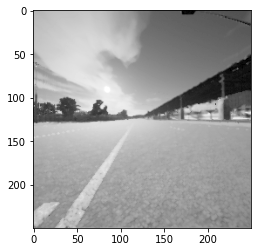

hi


In [ ]:
#steer_1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5, 0.0, 0.0, -0.5, 0.0, 0.0, 0.1, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.4, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.6, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.0, 0.0, 0.0, -0.4, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5, 0.0, 0.0, -0.2, -0.2, -0.6, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, -0.4, -0.7, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.2, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.7, 0.0, 0.2, 0.0, 0.0, -0.3, 0.0, 0.0, -0.2, -0.3, -0.7, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, -0.4, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.4, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, -0.3, -0.3, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.6, 0.0, 0.0, 0.0, 0.3, 0.7, 0.7, 0.0, -0.5, -0.7, -0.7, -0.7, -0.7, 0.1, 0.1, 0.2, 0.0, 0.5, 0.5, 0.7, 0.7, 0.7, 0.0, 0.0, -0.2, 0.0, -0.1, -0.1, -0.1, -0.5, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, 0.0, -0.5, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.1, 0.0, 0.0, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, 0.0, 0.0, 0.0, -0.3, 0.0, -0.5, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, 0.0, 0.0, 0.0, 0.0, -0.4, -0.4, -0.7, -0.7, 0.0, 0.0, 0.0, 0.7, 0.7, 0.1, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, -0.5, 0.0, 0.0, 0.0, -0.3, -0.3, -0.7, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, -0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.6, -0.7, -0.7, -0.7, -0.7, -0.7, -0.1, 0.0]
#if steer == steer_1:
#  print(True)

import matplotlib.pyplot as plt
plt.imshow(data_list[100][0][0], cmap='gray')
plt.show()
print("hi")

In [ ]:
validation_data = df[2142:]
df = df[:2142]

test_data = df[1764:]
df = df[:1764]

train_data = df
print(len(df))
print(len(validation_data))
print(len(test_data))
mse_loss = nn.MSELoss(reduction = 'mean')

1764
378
378


In [ ]:
target_fields = ['Steer Val', 'Throttle Val']

train_features, train_targets = train_data.drop(target_fields, axis=1), train_data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
validation_features, validation_targets = validation_data.drop(target_fields, axis=1), validation_data[target_fields]

In [ ]:
print(train_targets)

      Steer Val  Throttle Val
0       0.00000      0.110000
1      -0.00862      0.000000
2       0.00000      1.000000
3      -0.07314      0.288162
4      -0.70000      1.000000
...         ...           ...
1759   -0.12844      0.293228
1760   -0.00756      0.519102
1761   -0.08292      0.288244
1762   -0.05850      0.700000
1763    0.00000      0.390000

[1764 rows x 2 columns]


In [ ]:
from PIL import Image
class MyDataset(Dataset):
    def __init__(self, data, targets, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])):
        self.data = data
        self.targets = torch.FloatTensor(targets)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index].astype(np.float32)
        y = self.targets[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index].astype(np.float32))
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

data_1 = list(train_features['Image'])
targets_1 = []
list_1 = list(train_targets['Steer Val'])
list_2 = list(train_targets['Throttle Val'])
for i in range(len(list_1)):
 targets_1.append([list_1[i], list_2[i]])

data_2 = list(test_features['Image'])
targets_2 = []
list_1 = list(test_targets['Steer Val'])
list_2 = list(test_targets['Throttle Val'])
for i in range(len(list_1)):
  targets_2.append([list_1[i], list_2[i]])

data_3 = list(validation_features['Image'])
targets_3 = []
list_1 = list(validation_targets['Steer Val'])
list_2 = list(validation_targets['Throttle Val'])
for i in range(len(list_1)):
  targets_3.append([list_1[i], list_2[i]])

transform = transforms.Compose([transforms.Resize(250), transforms.ToTensor()])

train_dataset = MyDataset(data_1, targets_1, transform=transform)
test_dataset = MyDataset(data_2, targets_2, transform=transform)
validation_dataset = MyDataset(data_3, targets_3, transform=transform)
device = torch.device("cuda")

In [ ]:
class carla_regression(pl.LightningModule):
    def __init__(self, batch_size):
        super(carla_regression, self).__init__()
        self.batch_size = batch_size
        self.conv1 = nn.Conv2d(1, 24, 5, stride=2, padding=1)
        self.conv2 = nn.Conv2d(24, 36, 5, stride=2, padding=1)
        self.conv3 = nn.Conv2d(36, 48, 3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(48, 64, 3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(64, 64, 3, stride=1, padding=1)
        self.flat6 = nn.Flatten()
        
    def convs(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
            print(x[0].shape[0])
            print(x[0].shape[1])
            print(x[0].shape[2])
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = self.flat6(x)
        x, hidden = rnn(x, hidden)
        x = x.view(-1, self._to_linear)
        x = self.dropout1(x)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        # x = x.view(1, 16, 512)
        # self.hidden = self.hidden.to(device)
        # x, self.hidden = self.rnn(x, self.hidden)
        # x = x.contiguous().view(-1, 512)
        x = self.dropout3(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

    def train_dataloader(self):
        #train_dataset = TensorDataset(torch.tensor(train_features.values), torch.tensor(train_targets[['Steer Val']].values).float())
        #train_dataset = train_dataset.type(torch.LongTensor)
        train_loader = DataLoader(dataset = train_dataset, batch_size = self.batch_size)
        return train_loader
    
    def val_dataloader(self):
        #validation_dataset = TensorDataset(torch.tensor(validation_features.values), torch.tensor(validation_targets[['Steer Val']].values).float())
        #validation_dataset = validation_dataset.type(torch.LongTensor)
        validation_loader = DataLoader(dataset = validation_dataset, batch_size = self.batch_size)
        return validation_loader
    
    def test_dataloader(self):
        #test_dataset = TensorDataset(torch.tensor(test_features.values), torch.tensor(test_targets[['Steer Val']].values).float())
        #test_dataset = test_dataset.type(torch.LongTensor)
        test_loader = DataLoader(dataset = test_dataset, batch_size = self.batch_size)
        return test_loader
    
    def configure_optimizers(self):
        return optim.SGD(self.parameters(), lr=l_rate)
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        y = y.view(-1,2)
        loss = mse_loss(logits, y)
        # Add logging
        logs = {'loss': loss}
        self.log('train/loss', loss, on_epoch=True)
        return {'loss': loss, 'log': logs}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        y = y.view(-1,2)
        loss = mse_loss(logits, y)
        return {'val_loss': loss}

    def validation_epoch_end(self, outputs):
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        tensorboard_logs = {'val_loss': avg_loss}
        return {'avg_val_loss': avg_loss, 'log': tensorboard_logs}
    
    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        print(logits)
        y = y.view(-1,2)
        loss = mse_loss(logits, y)
        correct = torch.sum(logits == y.data)
        predictions_pred.append(logits)
        predictions_actual.append(y.data)
        return {'test_loss': loss, 'test_correct': correct, 'logits': logits}
    
    def test_epoch_end(self, outputs):
        avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
        logs = {'test_loss': avg_loss}      
        return {'avg_test_loss': avg_loss, 'log': logs, 'progress_bar': logs }

In [ ]:
from pytorch_lightning.loggers import TensorBoardLogger
lr_list = [.15, .20, .30, .40, .50]
batch_list = [16, 32, 64]
l_rate = .2
batch = 16
logger = TensorBoardLogger('tb_logs LR:{} batch size {}'.format(l_rate,batch), name = 'Carla Regression Model')
model = carla_regression(16)
trainer = Trainer(max_epochs = 35,gpus = -1, logger=logger, log_every_n_steps=1)
trainer.fit(model)

128
31
31


In [ ]:
predictions_pred = []
predictions_actual = []
trainer.test()

Testing: 0it [00:00, ?it/s]

tensor([[-0.0736,  0.3045],
        [-0.0188,  0.2665],
        [ 0.0739,  0.3567],
        [-0.0686,  0.0671],
        [-0.0209,  0.4158],
        [-0.0714,  0.3496],
        [-0.0137,  0.5587],
        [-0.1377,  0.3103],
        [-0.0774,  0.2962],
        [-0.2954,  0.7936],
        [ 0.0365,  0.4434],
        [ 0.0497,  0.1907],
        [-0.0232,  0.2937],
        [-0.0806,  1.0403],
        [ 0.0250,  0.3734],
        [-0.0283,  0.8900]], device='cuda:0')
tensor([[-5.2975e-02,  2.8236e-01],
        [ 2.3642e-01,  5.8833e-01],
        [ 6.2356e-01,  4.4276e-02],
        [-8.4458e-02,  8.0034e-01],
        [ 9.3829e-02,  7.4678e-01],
        [-6.3138e-02,  7.2981e-01],
        [-3.8590e-02,  6.4862e-01],
        [ 9.1285e-04,  1.8223e-01],
        [ 2.3424e-04,  6.1216e-02],
        [ 3.0495e-03,  3.1300e-01],
        [-9.0175e-02,  2.7849e-01],
        [ 2.0999e-01,  9.4257e-01],
        [ 3.1494e-02,  1.5739e-01],
        [-8.3437e-02,  2.9215e-01],
        [ 1.6905e-01,  7.4016e

[{}]

In [ ]:
#trainer.save_checkpoint("/content/drive/MyDrive/carka_neuralnet/regression_carla_1.ckpt")
torch.save(model.state_dict(), "/content/drive/MyDrive/carka_neuralnet/regression_carla_10.ckpt")